## NOTES:
<ul>
<li>This section is specifically for visualizing the datasets produced by Aquifer Analsys</li>
<li>This section does not generate any new data. Unless otherwise specified, the <strong>input file</strong> for any of these cells is an aquifer analysis spreadsheet of the form <em>Aquifer_Name_Range_Quantile.xlsx</em> </li>
</ul>


## Imports

In [222]:
#Python3.10
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import calendar
from importlib import reload
import mapclassify as mc

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

## Compare Valid Sites
Compare number of valid sites by % for the 30-year and 50-year records.

### Import national metrics and validity dfs

In [223]:
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

# Dataset upload
range = 30
quantile = 90
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_30_90 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 30
quantile = 95
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_30_95 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 50
quantile = 90
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_50_90 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 50
quantile = 95
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_50_95 = pd.read_excel(datapath, sheet_name='site_metrics')

In [224]:
datapath = f'Prelim_Data/National_Validity/National_Validity.xlsx'
df_validity = pd.read_excel(datapath, sheet_name='Sheet1')

### Print number of sites based on different validity criteria

In [225]:
df_30_90_valid_metric = df_30_90[(df_30_90['missing_data%'] <= 10) & (df_30_90['analyze_range'] >= 27)]
df_30_90_valid = df_30_90[df_30_90['valid'] == True] # THIS OPTION IS CORRECT
df_30_90_valid_val = df_validity[(df_validity['date_range_30'] == True) & (df_validity['data_cont_30'] == True)]
print('--- 30-Year Valid Gages ---')
print(f'Valid 30-Year gages (missing_data% <= 10 & analyze_range >= 27): {len(df_30_90_valid_metric)}') # 183 difference from last run
print(f'Valid 30-Year gages (valid = True): {len(df_30_90_valid)}')
print(f'Valid 30-Year gages (date_range_30 = True & data_cont_30) = True: {len(df_30_90_valid_val)}')

df_50_90_valid_metric = df_50_90[(df_50_90['missing_data%'] <= 10) & (df_50_90['analyze_range'] >= 45)]
df_50_90_valid = df_50_90[df_50_90['valid'] == True] # THIS OPTION IS CORRECT
df_50_90_valid_val = df_validity[(df_validity['date_range_50'] == True) & (df_validity['data_cont_50'] == True)]
print('--- 50-Year Valid Gages ---')
print(f'Valid 50-Year gages (missing_data% <= 10 & analyze_range >= 45): {len(df_50_90_valid_metric)}') # 183 difference from last run
print(f'Valid 50-Year gages (valid = True): {len(df_50_90_valid)}')
print(f'Valid 50-Year gages (date_range_50 = True & data_cont_50) = True: {len(df_50_90_valid_val)}')

print('--- 95th Percentile---')
df_30_95_valid = df_30_95[df_30_95['valid'] == True] # THIS OPTION IS CORRECT
print(f'Valid 30-Year gages (valid = True): {len(df_30_95_valid)}')
df_50_95_valid = df_50_95[df_50_95['valid'] == True] # THIS OPTION IS CORRECT
print(f'Valid 50-Year gages (valid = True): {len(df_50_95_valid)}')

--- 30-Year Valid Gages ---
Valid 30-Year gages (missing_data% <= 10 & analyze_range >= 27): 4270
Valid 30-Year gages (valid = True): 4241
Valid 30-Year gages (date_range_30 = True & data_cont_30) = True: 4088
--- 50-Year Valid Gages ---
Valid 50-Year gages (missing_data% <= 10 & analyze_range >= 45): 3329
Valid 50-Year gages (valid = True): 3316
Valid 50-Year gages (date_range_50 = True & data_cont_50) = True: 3155
--- 95th Percentile---
Valid 30-Year gages (valid = True): 4241
Valid 50-Year gages (valid = True): 3316


### Histogram illustrating % of missing gages for 90/95th percentiles

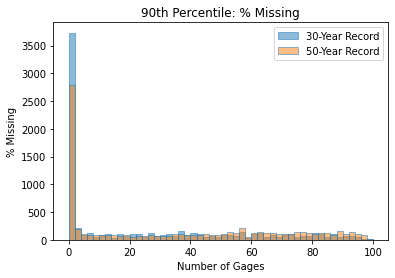

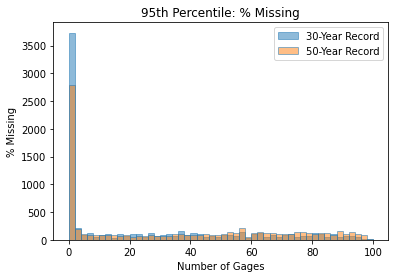

In [226]:
plt.hist(df_30_90['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='30-Year Record')
plt.hist(df_50_90['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='50-Year Record')
plt.xlabel('Number of Gages')
plt.ylabel('% Missing')
plt.title('90th Percentile: % Missing')
plt.legend()
plt.show()

plt.hist(df_30_95['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='30-Year Record')
plt.hist(df_50_95['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='50-Year Record')
plt.xlabel('Number of Gages')
plt.ylabel('% Missing')
plt.title('95th Percentile: % Missing')
plt.legend()
plt.show()

## Select sites that are within the 30-year and 50-year valid sites

In [227]:
def sort_data(df):
    df_sort = df.sort_values(by='threshold')
    df_zero_hmf = df_sort[df_sort['threshold'] == 0]
    df_sort = df_sort[df_sort['threshold'] > 0]
    df_sort['site_no'] = df_sort['site_no'].astype(str)
    return df_sort, df_zero_hmf

df_30_90_sort, df_30_90_zero_hmf = sort_data(df_30_90_valid) # NOTE: 24 gages with 0 cfs as threshold
df_50_90_sort, df_50_90_zero_hmf = sort_data(df_50_90_valid) # NOTE: 12 gages with 0 cfs as threshold
df_30_90_merge = pd.merge(df_30_90_sort, df_50_90_sort, on='site_no', how='inner', suffixes=('_30', '_50')) # only keep rows from second df that appear in first first df
df_90_merge = pd.merge(df_30_90_merge, df_50_90_sort, on='site_no', how='inner', suffixes=('_30', '_50'))
# NOTE: df_90_merge sorted by 30-year threshold (smallest -> largest)

df_30_95_sort, df_30_95_zero_hmf = sort_data(df_30_95_valid)
df_50_95_sort, df_50_95_zero_hmf = sort_data(df_50_95_valid)
df_30_95_merge = pd.merge(df_30_95_sort, df_50_95_sort, on='site_no', how='inner', suffixes=('_30', '_50')) # only keep rows from second df that appear in first first df
df_95_merge = pd.merge(df_30_95_merge, df_50_95_sort, on='site_no', how='inner', suffixes=('_30', '_50'))
# NOTE: df_95_merge sorted by 30-year threshold (smallest -> largest)

In [228]:
print('--- 90th Percentile ---')
print(f'30-Year gages (valid = True): {len(df_30_90_valid)}')
print('30-year gages with threshold > 0 cfs:', len(df_30_90_sort))
print(f'50-Year gages (valid = True): {len(df_50_90_valid)}')
print('50-year gages with threshold > 0 cfs:', len(df_50_90_sort))
print('50-year gages in 30-year gages list:', len(df_30_90_merge))
print('30-year gages in 50-year gages list:', len(df_90_merge))

print('--- 95th Percentile ---')
print(f'30-Year gages (valid = True): {len(df_30_95_valid)}')
print('30-year gages with threshold > 0 cfs:', len(df_30_95_sort))
print(f'50-Year gages (valid = True): {len(df_50_95_valid)}')
print('50-year gages with threshold > 0 cfs:', len(df_50_95_sort))
print('50-year gages in 30-year gages list:', len(df_30_95_merge))
print('30-year gages in 50-year gages list:', len(df_95_merge))

--- 90th Percentile ---
30-Year gages (valid = True): 4241
30-year gages with threshold > 0 cfs: 4217
50-Year gages (valid = True): 3316
50-year gages with threshold > 0 cfs: 3304
50-year gages in 30-year gages list: 3242
30-year gages in 50-year gages list: 3242
--- 95th Percentile ---
30-Year gages (valid = True): 4241
30-year gages with threshold > 0 cfs: 4229
50-Year gages (valid = True): 3316
50-year gages with threshold > 0 cfs: 3307
50-year gages in 30-year gages list: 3245
30-year gages in 50-year gages list: 3245


In [229]:
print(df_30_90_zero_hmf['site_no'].tolist())
print(df_50_90_zero_hmf['site_no'].tolist())

[8401900, 9419740, 9419756, 8185000, 9482000, 9486800, 9487000, 9512162, 8398500, 9513860, 8400000, 9517490, 8401200, 9520280, 11077500, 8404000, 8405150, 8202700, 13132513, 10259050, 10259100, 10259300, 10262500, 11122010]
[11077500, 9513860, 8398500, 8400000, 10259300, 8185000, 10262500, 8202700, 8405150, 8401900, 8404000, 8401200]


### Log plot of 30 vs. 50-year thresholds for all gages

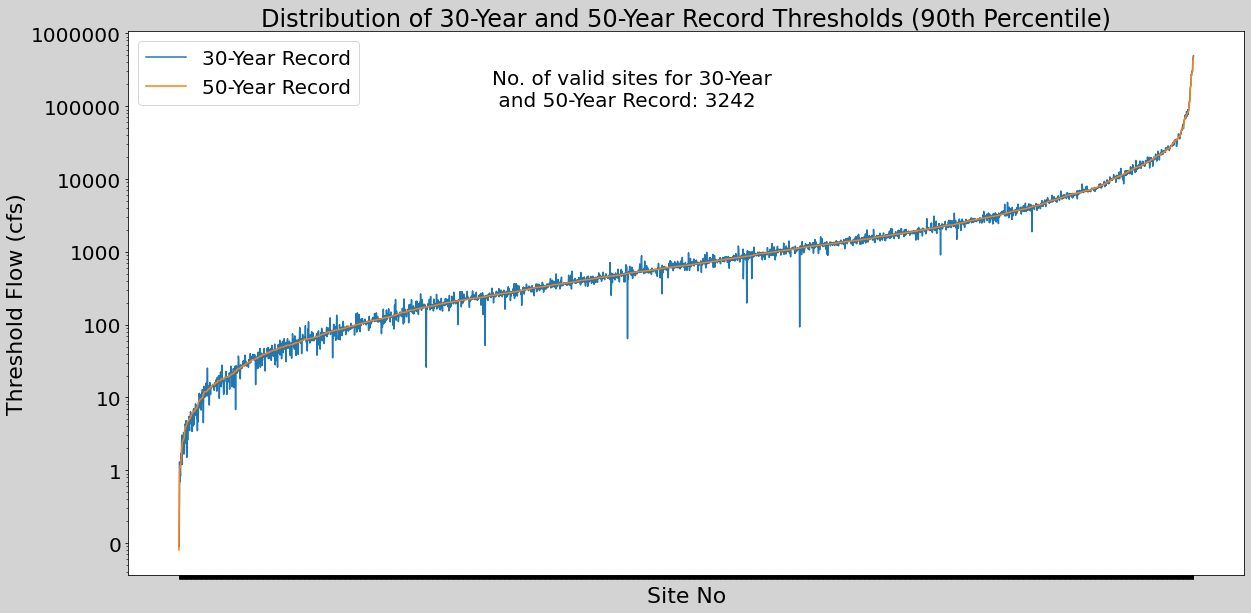

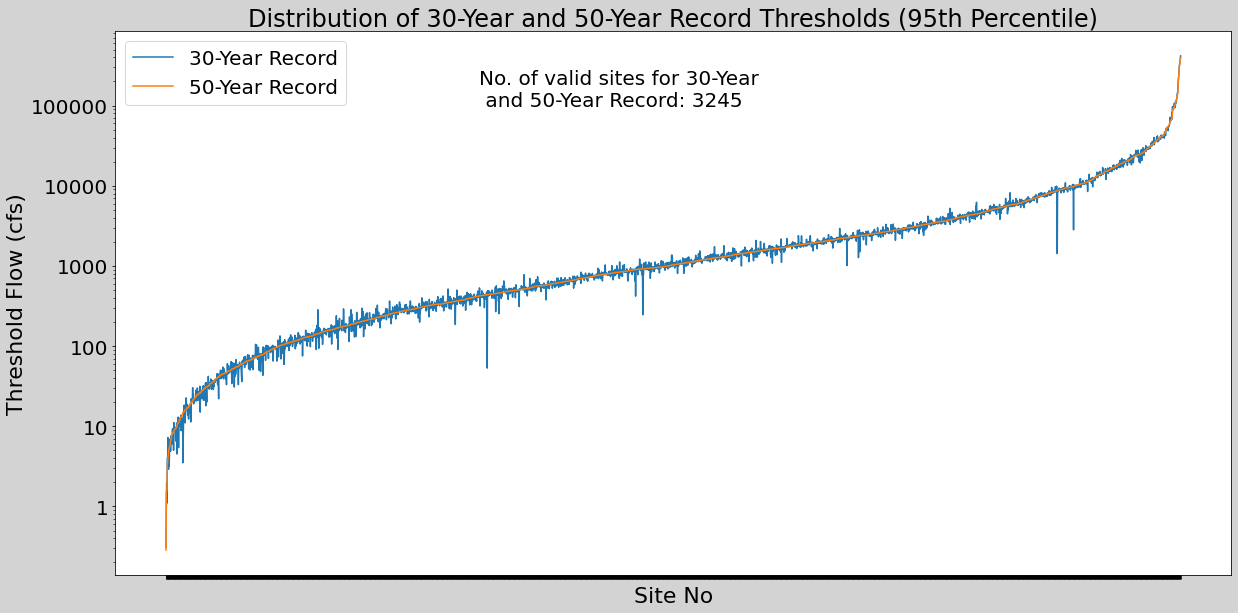

In [196]:
def plot_threshold_log(df, sort_date_range, start_value, end_value, percentile, save:True):
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='lightgrey')

    df = df.sort_values(by=sort_date_range)
    
    if sort_date_range == 'threshold_50':
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_30'][start_value:end_value], color='C0', label='30-Year Record')
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_50'][start_value:end_value], color='C1', label='50-Year Record')
    elif sort_date_range == 'threshold_30':
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_50'][start_value:end_value], color='C1', label='50-Year Record')
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_30'][start_value:end_value], color='C0', label='30-Year Record')

    formatter = ScalarFormatter()
    formatter.set_scientific(False)  # Disable scientific notation
    plt.gca().yaxis.set_major_formatter(formatter)

    ax.set_xlabel('Site No', fontsize=22)
    ax.set_ylabel('Threshold Flow (cfs)', fontsize=22)
    ax.tick_params(axis='x',  rotation=90)
    ax.tick_params(axis='y', labelsize=20)
    plt.gca().set_xticklabels([])
    
    plt.title(f'Distribution of 30-Year and 50-Year Record Thresholds ({percentile}th Percentile)', fontsize=24)

    plt.legend(fontsize=20)
    
    if percentile == '90':
        plt.text(1000, 100000, f'No. of valid sites for 30-Year \n and 50-Year Record: {len(df_90_merge)}', fontsize=20)
    else:
        plt.text(1000, 100000, f'No. of valid sites for 30-Year \n and 50-Year Record: {len(df_95_merge)}', fontsize=20)

    if save == True:
        plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_log_{sort_date_range}_{percentile}.png', bbox_inches='tight')
    plt.show()
    return

#plot_threshold_log(df_90_merge, 'threshold_50', 0, 500, '90', False)
plot_threshold_log(df_90_merge, 'threshold_50', 0, len(df_90_merge), '90', True)
plot_threshold_log(df_95_merge, 'threshold_50', 0, len(df_90_merge), '95', True)

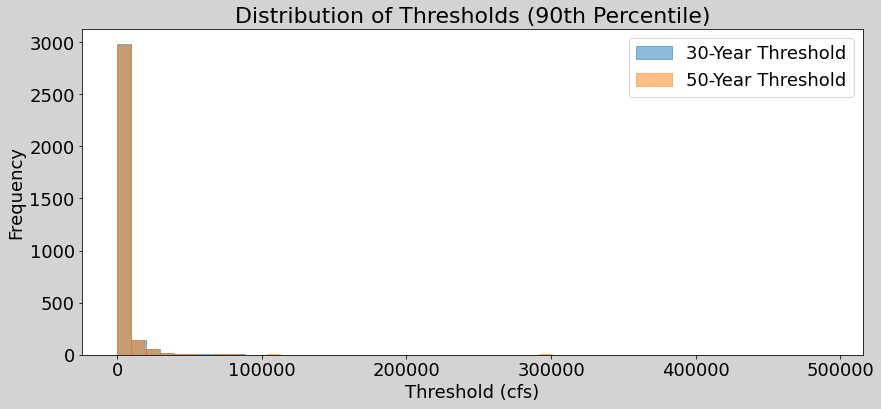

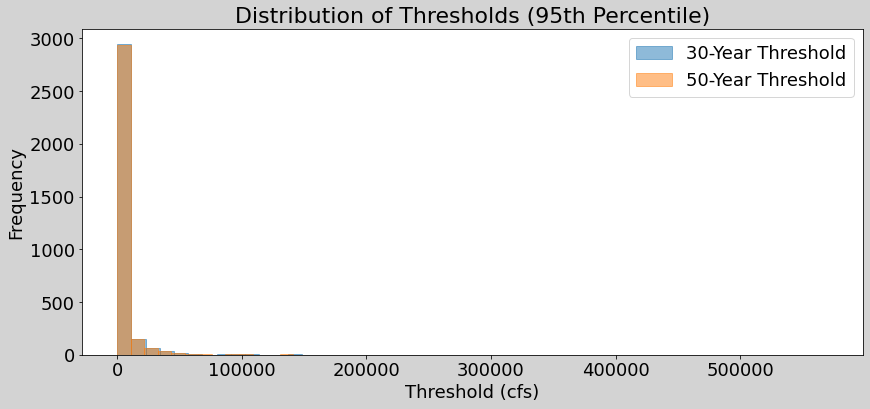

In [198]:
# Histogram of thresholds by frequnecy
def histogram_thresholds(df, percentile):
    plt.figure(figsize=(14, 6), facecolor='lightgrey')
    plt.hist(df['threshold_30'], bins=50, alpha=0.5, color='C0', edgecolor='C0', label='30-Year Threshold')
    plt.hist(df['threshold_50'], bins=50, alpha=0.5, color='C1', edgecolor='C1', label='50-Year Threshold')
    plt.xlabel('Threshold (cfs)', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.title(f'Distribution of Thresholds ({percentile}th Percentile)', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=18)
    plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_hist_{percentile}.png', bbox_inches='tight')
    plt.show()
    
histogram_thresholds(df_90_merge, '90')
histogram_thresholds(df_95_merge, '95')

## Calculate the percent deviation in the 30 vs. 50-year thresholds

In [230]:
# Calculate how much higher the 30-year threshold is than the 50-year threshold
df_90_merge['pct_diff'] = (df_90_merge['threshold_30'] - df_90_merge['threshold_50']) / df_90_merge['threshold_50'] * 100
df_95_merge['pct_diff'] = (df_95_merge['threshold_30'] - df_95_merge['threshold_50']) / df_95_merge['threshold_50'] * 100

In [231]:
# Scatter plot illustrating percent change in 30-yr vs. 50-year record thresholds
# fig, ax = plt.subplots(figsize=(20, 5), facecolor='lightgrey')
# df_90_merge_resort = df_90_merge.sort_values(by='threshold_50')
# ax.plot(df_90_merge_resort['site_no'], df_90_merge_resort['pct_diff'], label='90th perc.')
# #df_95_merge_resort = df_95_merge.sort_values(by='threshold_50')
# #ax.plot(df_95_merg_resorte['site_no'], df_95_merge_resort['pct_diff'], label='95th perc.')
# ax.set_ylabel('Percent Change')
# plt.show()

### Histogram of 30 vs. 50-year threshold deviation

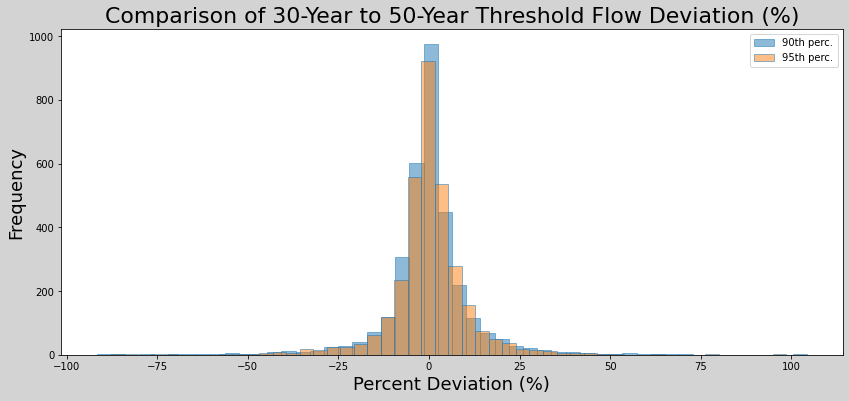

In [232]:
plt.figure(figsize=(14, 6), facecolor='lightgrey')
plt.hist(df_90_merge['pct_diff'], bins=50, alpha=0.5, edgecolor='C0', label='90th perc.')
plt.hist(df_95_merge['pct_diff'], bins=50, alpha=0.5, edgecolor='C0', label='95th perc.')
plt.xlabel('Percent Deviation (%)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Comparison of 30-Year to 50-Year Threshold Flow Deviation (%)', fontsize=22)
plt.legend()
plt.savefig(f'Saved_Visuals/Valid_gages/threshold_pct_diff_hist.png', bbox_inches='tight')
plt.show()

### Boxplots and maps of 30 vs. 50-year threshold deviation

In [273]:
# Function to map gages by percent deviation
def pct_diff_map(df, percentile, upper_whisker, lower_whisker, Q1, Q3):
    trend_options = ['higher_outliers', 'lower_outliers', 'higher_75perc', 'lower_25perc', 'iqr']
    colors = {'higher_outliers': 'blue', 'lower_outliers': 'red', 'higher_75perc': 'green', 'lower_25perc':'orange', 'iqr': 'yellow'}
    markers = {'higher_outliers': '^', 'lower_outliers': 'v', 'higher_75perc': '^', 'lower_25perc':'v', 'iqr': 'o'}
    labels = {'higher_outliers': '% Deviation > Max', 'lower_outliers': '% Deviation < Min', 
              'higher_75perc': 'Q3 < % Deviation < Max', 'lower_25perc':'Min < % Deviation < Q1', 'iqr': 'Q1 < % Deviation < Q3'}
    markersizes = {'higher_outliers': 500, 'lower_outliers': 500, 'higher_75perc': 200, 'lower_25perc':200, 'iqr': 50}
    
    fig, ax = plt.subplots(figsize=(35, 35))

    lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

    # aq_names = [aq.name for aq in aquifers]
    # aq_gdf = aq_shape[aq_shape['aq_name'].isin(aq_names)]
    # aq_gdf = aq_gdf.to_crs(epsg=4269)
    # #aq_gdf = aq_gdf.to_crs('ESRI:102003')
    # aq_gdf.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

    # Gages plot, with points marked by MK trend
    # lat = df['dec_lat_va'].tolist()
    # long = df['dec_long_va'].tolist()
    # geometry = [Point(xy) for xy in zip(long, lat)]
    # geo_df = gpd.GeoDataFrame(geometry=geometry)
    #bx = geo_df.plot(ax=ax, color='red', marker='o', markersize=100, edgecolor='black', linewidth=1, alpha=0.75, legend=True)

    for trend_opt in trend_options:
        if trend_opt == 'iqr':
            df_subset = df[(df['pct_diff'] > Q1) & (df['pct_diff'] < Q3)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)    
        elif trend_opt == 'higher_outliers':
            df_subset = df[(df['pct_diff'] > upper_whisker)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'higher_75perc':
            df_subset = df[(df['pct_diff'] < upper_whisker) & (df['pct_diff'] > Q3)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'lower_25perc':
            df_subset = df[(df['pct_diff'] > lower_whisker) & (df['pct_diff'] < Q1)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'lower_outliers':
            df_subset = df[(df['pct_diff'] < lower_whisker)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)

    plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
    plt.legend(fontsize=28)

    plt.axis("off")

    plt.tight_layout()
    plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
    plt.show()
    return

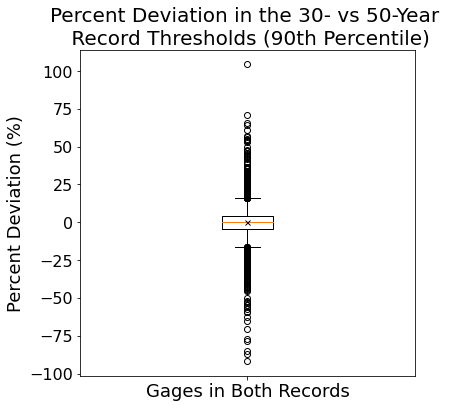

25th Percentile: -4.285714285714285
Median: 0.0
Mean: -0.11951272466930993
75th Percentile: 3.845552884615471
Lower whisker: -16.48261504120892
Upper whisker: 16.042453640110107


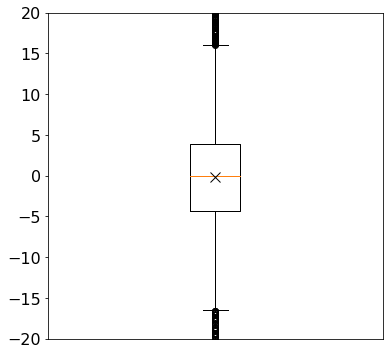

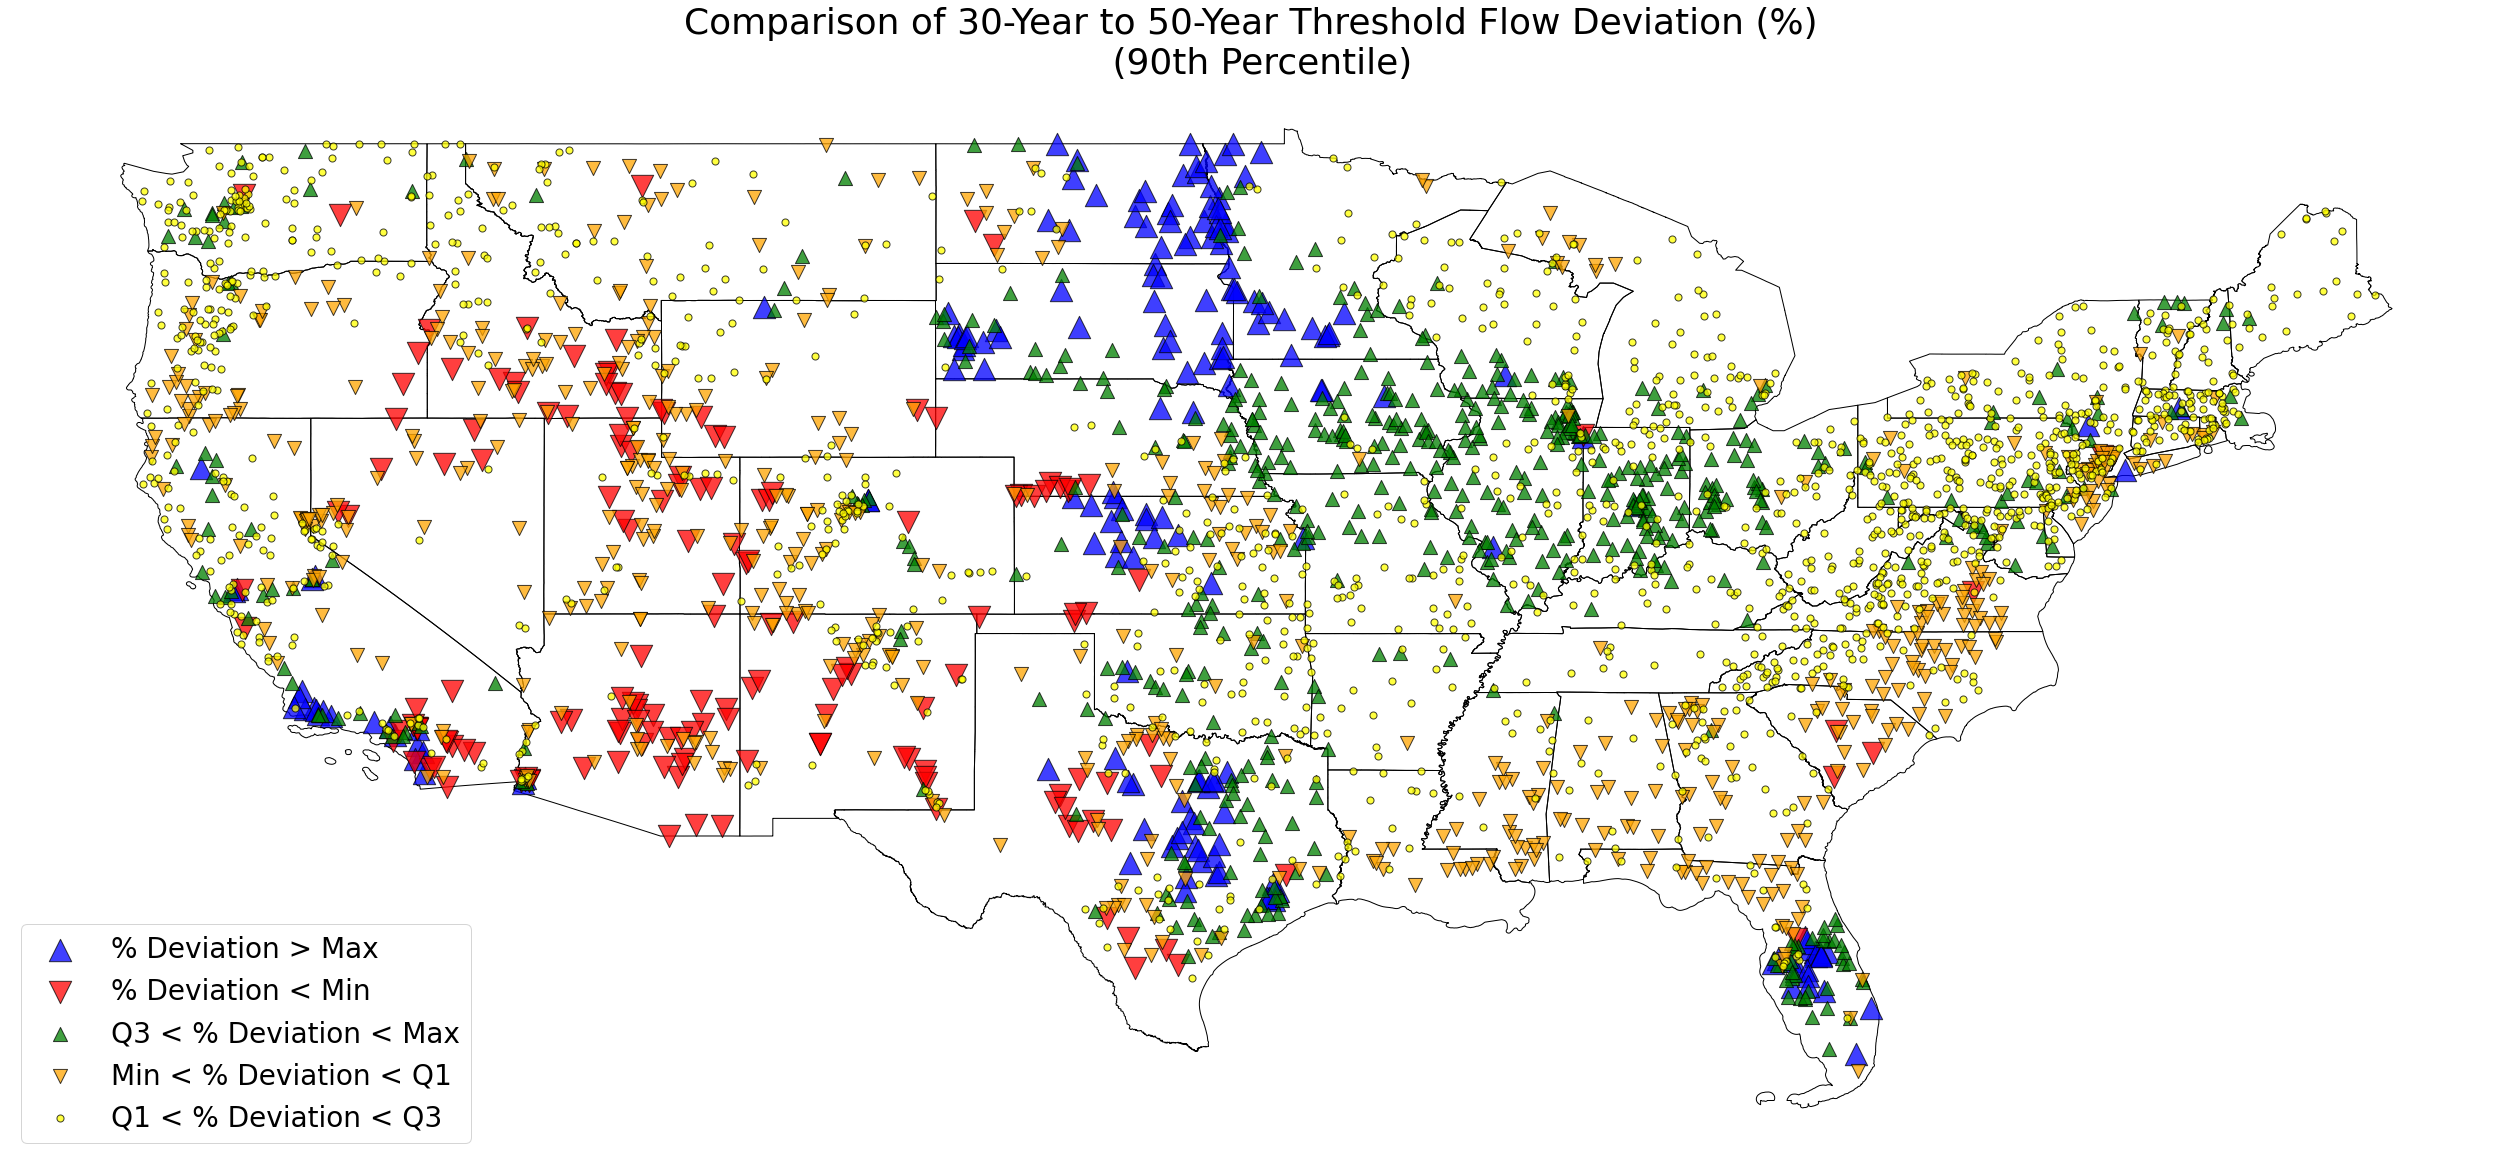

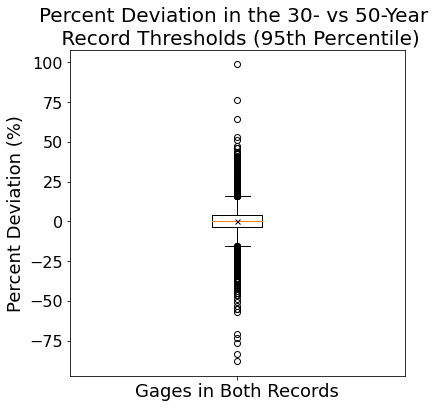

25th Percentile: -3.8461538461538463
Median: 0.0
Mean: -0.08754247620756264
75th Percentile: 4.0
Lower whisker: -15.615384615384617
Upper whisker: 15.76923076923077


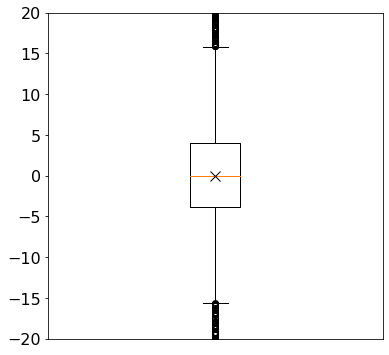

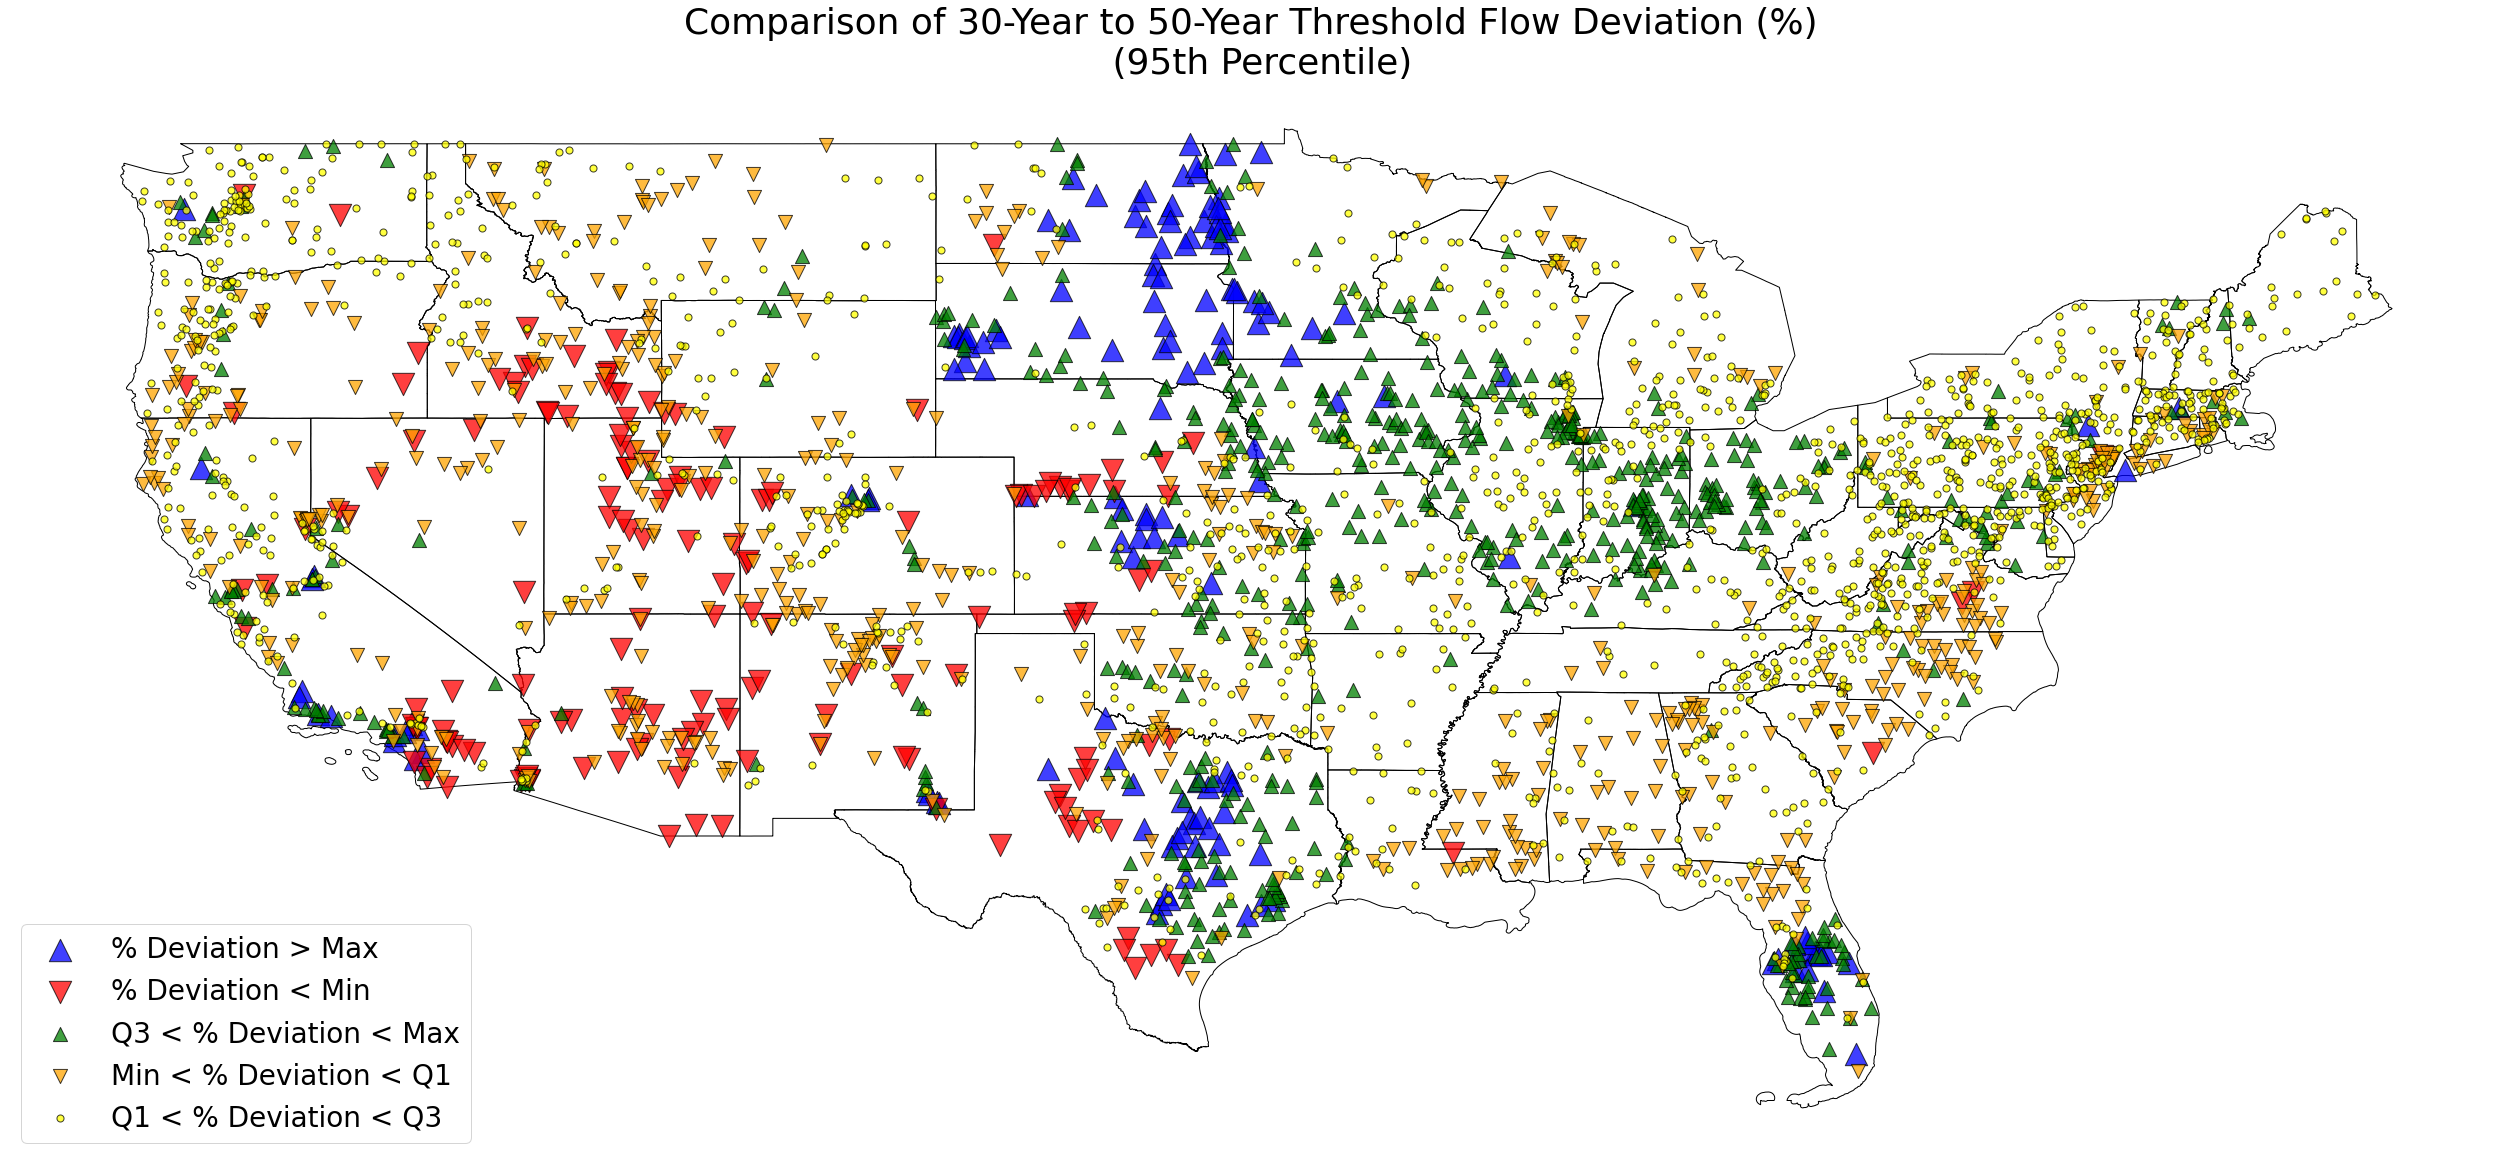

In [301]:
# Box plot of percent change
def pct_diff_boxplot(df, percentile, map=True):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.boxplot(df['pct_diff'], showmeans=True, meanprops=dict(marker='x', markerfacecolor='black', markeredgecolor='black', markersize=5))
    #ax.boxplot(None, showmeans=True)
    ax.set_xticks([1], ['Gages in Both Records'], fontsize=18)
    ax.set_ylabel('Percent Deviation (%)', fontsize=18)
    ax.tick_params(axis='y', labelsize=16)
    plt.title(f'Percent Deviation in the 30- vs 50-Year \n Record Thresholds ({percentile}th Percentile)', fontsize=20)
    plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_boxplot_{percentile}.png', bbox_inches='tight')
    plt.show()

    Q1 = np.percentile(df['pct_diff'], 25)
    Q3 = np.percentile(df['pct_diff'], 75)
    IQR = Q3 - Q1
    lower_whisker = np.percentile(df['pct_diff'], 0) if Q1 - 1.5 * IQR < np.min(df['pct_diff']) else Q1 - 1.5 * IQR
    upper_whisker = np.percentile(df['pct_diff'], 100) if Q3 + 1.5 * IQR > np.max(df['pct_diff']) else Q3 + 1.5 * IQR

    print('25th Percentile:', Q1)
    print('Median:', np.median(df['pct_diff']))
    print('Mean:', np.mean(df['pct_diff']))
    print('75th Percentile:', Q3)
    print("Lower whisker:", lower_whisker)
    print("Upper whisker:", upper_whisker)
    
    # Zoomed in plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.boxplot(df['pct_diff'], showmeans=True, meanprops=dict(marker='x', markerfacecolor='black', markeredgecolor='black', markersize=10))
    ax.set_xticks([0], ['Gages in Both Records'], fontsize=18)
    #ax.set_ylabel('Percent Deviation (%)', fontsize=18)
    ax.set_ylim(-20, 20)
    ax.tick_params(axis='y', labelsize=16)
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # plt.gca().spines['bottom'].set_visible(False)
    # plt.gca().spines['left'].set_visible(False)
    #plt.title(f'Percent Deviation in the 30- vs 50-Year \n Record Thresholds ({percentile}th Percentile)', fontsize=20)
    plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_boxplot_{percentile}_zoom.png', bbox_inches='tight')
    plt.show()
    
    if map == True:
        pct_diff_map(df, percentile, upper_whisker, lower_whisker, Q1, Q3)
    else:
        pass
    
    return 

pct_diff_boxplot(df_90_merge, '90', True)
pct_diff_boxplot(df_95_merge, '95', True)

In [263]:
df_90_merge_edit = df_90_merge.copy()
df_90_merge_edit['pct_diff_inter_ann'] = (df_90_merge['inter_annual%_30'] - df_90_merge['inter_annual%_50']) / df_90_merge['inter_annual%_50'] * 100

df_95_merge_edit = df_95_merge.copy()
df_95_merge_edit['pct_diff_inter_ann'] = (df_95_merge['inter_annual%_30'] - df_95_merge['inter_annual%_50']) / df_95_merge['inter_annual%_50'] * 100

#upper_outliers = df_90_merge[df_90_merge['pct_diff'] > 16.02]
df_90_merge_edit = df_90_merge_edit.sort_values(by='pct_diff')
df_95_merge_edit = df_95_merge_edit.sort_values(by='pct_diff')
#upper_outliers.columns.tolist()

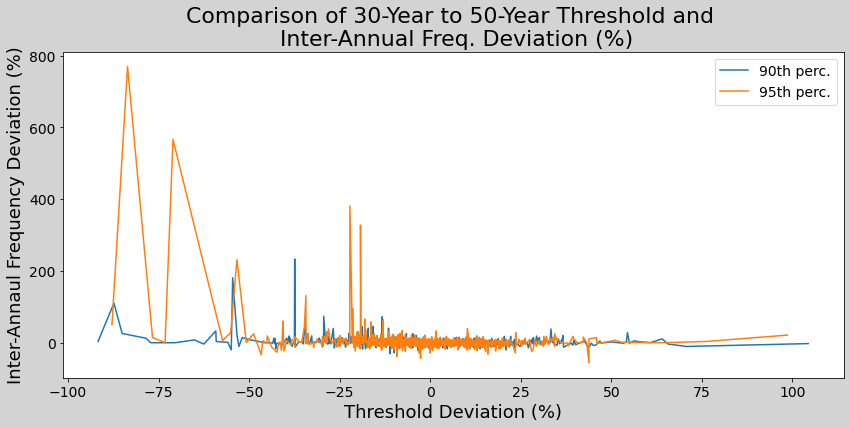

In [268]:
plt.figure(figsize=(14, 6), facecolor='lightgrey')
plt.plot(df_90_merge_edit['pct_diff'], df_90_merge_edit['pct_diff_inter_ann'], label='90th perc.')
plt.plot(df_95_merge_edit['pct_diff'], df_95_merge_edit['pct_diff_inter_ann'], label='95th perc.')
plt.xlabel('Threshold Deviation (%)', fontsize=18)
plt.ylabel('Inter-Annaul Frequency Deviation (%)', fontsize=18)
plt.title('Comparison of 30-Year to 50-Year Threshold and \n Inter-Annual Freq. Deviation (%)', fontsize=22)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.legend(fontsize=14)
plt.savefig(f'Saved_Visuals/Valid_gages/threshold_pct_diff_inter_ann_scatter.png', bbox_inches='tight')
plt.show()

In [249]:
# QA/QC PERCENT DIFFERENCE
# percentile = '90'
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.boxplot(df_90_merge['pct_diff'], showmeans=True)
# ax.set_xticks([1], ['All Overlapping Sites'], fontsize=18)
# ax.set_ylabel('Percent Difference (%)', fontsize=18)
# ax.tick_params(axis='y', labelsize=16)
# plt.title(f'Boxplot Illustrating the Percent Difference in the \n 30- vs 50-Year Record Thresholds ({percentile}th Percentile)', fontsize=20)
# plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_boxplot_{percentile}.png', bbox_inches='tight')
# plt.show()

# Q1 = np.percentile(df_90_merge['pct_diff'], 25)
# Q3 = np.percentile(df_90_merge['pct_diff'], 75)
# IQR = Q3 - Q1
# lower_whisker = np.percentile(df_90_merge['pct_diff'], 0) if Q1 - 1.5 * IQR < np.min(df_90_merge['pct_diff']) else Q1 - 1.5 * IQR
# upper_whisker = np.percentile(df_90_merge['pct_diff'], 100) if Q3 + 1.5 * IQR > np.max(df_90_merge['pct_diff']) else Q3 + 1.5 * IQR

# print('25th Percentile:', Q1)
# print('Median:', np.median(df_90_merge['pct_diff']))
# print('Mean:', np.mean(df_90_merge['pct_diff']))
# print('75th Percentile:', Q3)
# print("Lower whisker:", lower_whisker)
# print("Upper whisker:", upper_whisker)

# trend_options = ['higher_outliers', 'lower_outliers', 'higher_75perc', 'lower_25perc', 'iqr']
# colors = {'higher_outliers': 'red', 'lower_outliers': 'blue', 'higher_75perc': 'orange', 'lower_25perc':'green', 'iqr': 'yellow'}
# markers = {'higher_outliers': '^', 'lower_outliers': 'v', 'higher_75perc': '^', 'lower_25perc':'v', 'iqr': 'o'}
# labels = {'higher_outliers': '% Deviation > Max', 'lower_outliers': '% Deviation < Min', 
#           'higher_75perc': 'Q3 < % Deviation < Max', 'lower_25perc':'Min < % Deviation < Q1', 'iqr': 'Q1 < % Deviation < Q3'}
# markersizes = {'higher_outliers': 500, 'lower_outliers': 500, 'higher_75perc': 200, 'lower_25perc':200, 'iqr': 50}

# ############################################

# fig, ax = plt.subplots(figsize=(35, 35))

# lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
# lower48 = lower48.to_crs(epsg=4269)
# #lower48 = lower48.to_crs('ESRI:102003')
# lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

# #print(df_90_merge[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# lat = df_90_merge['dec_lat_va'].tolist()
# long = df_90_merge['dec_long_va'].tolist()
# geometry = [Point(xy) for xy in zip(long, lat)]
# geo_df = gpd.GeoDataFrame(geometry=geometry)
# print(geo_df[0:15])
# df_subset = df_90_merge[(df_90_merge['pct_diff'] > upper_whisker)]
# print(df_subset[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# geo_subset = geo_df.iloc[df_subset.index]
# print(geo_subset[0:15])
# bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
#                      label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)  

# plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
# plt.legend(fontsize=28)
# plt.axis("off")
# plt.tight_layout()
# #plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
# plt.show()

# ############################################

# fig, ax = plt.subplots(figsize=(35, 35))

# lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
# lower48 = lower48.to_crs(epsg=4269)
# #lower48 = lower48.to_crs('ESRI:102003')
# lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

# print(df_90_merge[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# df_subset2 = df_90_merge[(df_90_merge['pct_diff'] > upper_whisker)]
# print(df_subset2[['dec_long_va', 'dec_lat_va']][0:15])
# lat2 = df_subset2['dec_lat_va'].tolist()
# long2 = df_subset2['dec_long_va'].tolist()
# geometry2 = [Point(xy) for xy in zip(long2, lat2)]
# geo_subset2 = gpd.GeoDataFrame(geometry=geometry2)
# print(geo_subset2[0:15])
# bx = geo_subset2.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
#                      label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)  

# plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
# plt.legend(fontsize=28)
# plt.axis("off")
# plt.tight_layout()
# #plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
# plt.show()

In [250]:
# Plotting sites with different thresholds
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
streams = gpd.read_file('ShapeFiles/Streams_US/us_streams.shp')
counties_us = gpd.read_file('ShapeFiles/Counties_US/cb_2018_us_county_20m.shp')

aquifers = cl.ALL_AQUIFERS

# All gages - National metrics dfs

In [120]:
# All gages - National metrics dfs
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/National_Metrics_50_95.xlsx'    
}

dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}

In [125]:
# Valid gages - National metrics dfs
date_ranges = ['30', '50']
percentiles = ['90', '95']
dfs_valid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_valid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == True]

In [205]:
metric = 'annual_hmf' #'timing' #'intra_annual' #'event_hmf' #'event_duration' #'annual_duration' #'annual_hmf' #'inter_annual%'
date_range = 30
quantile = 90

df_wrong_index = dfs_valid[f'{date_range}_{percentile}']
df = df_wrong_index.reset_index()

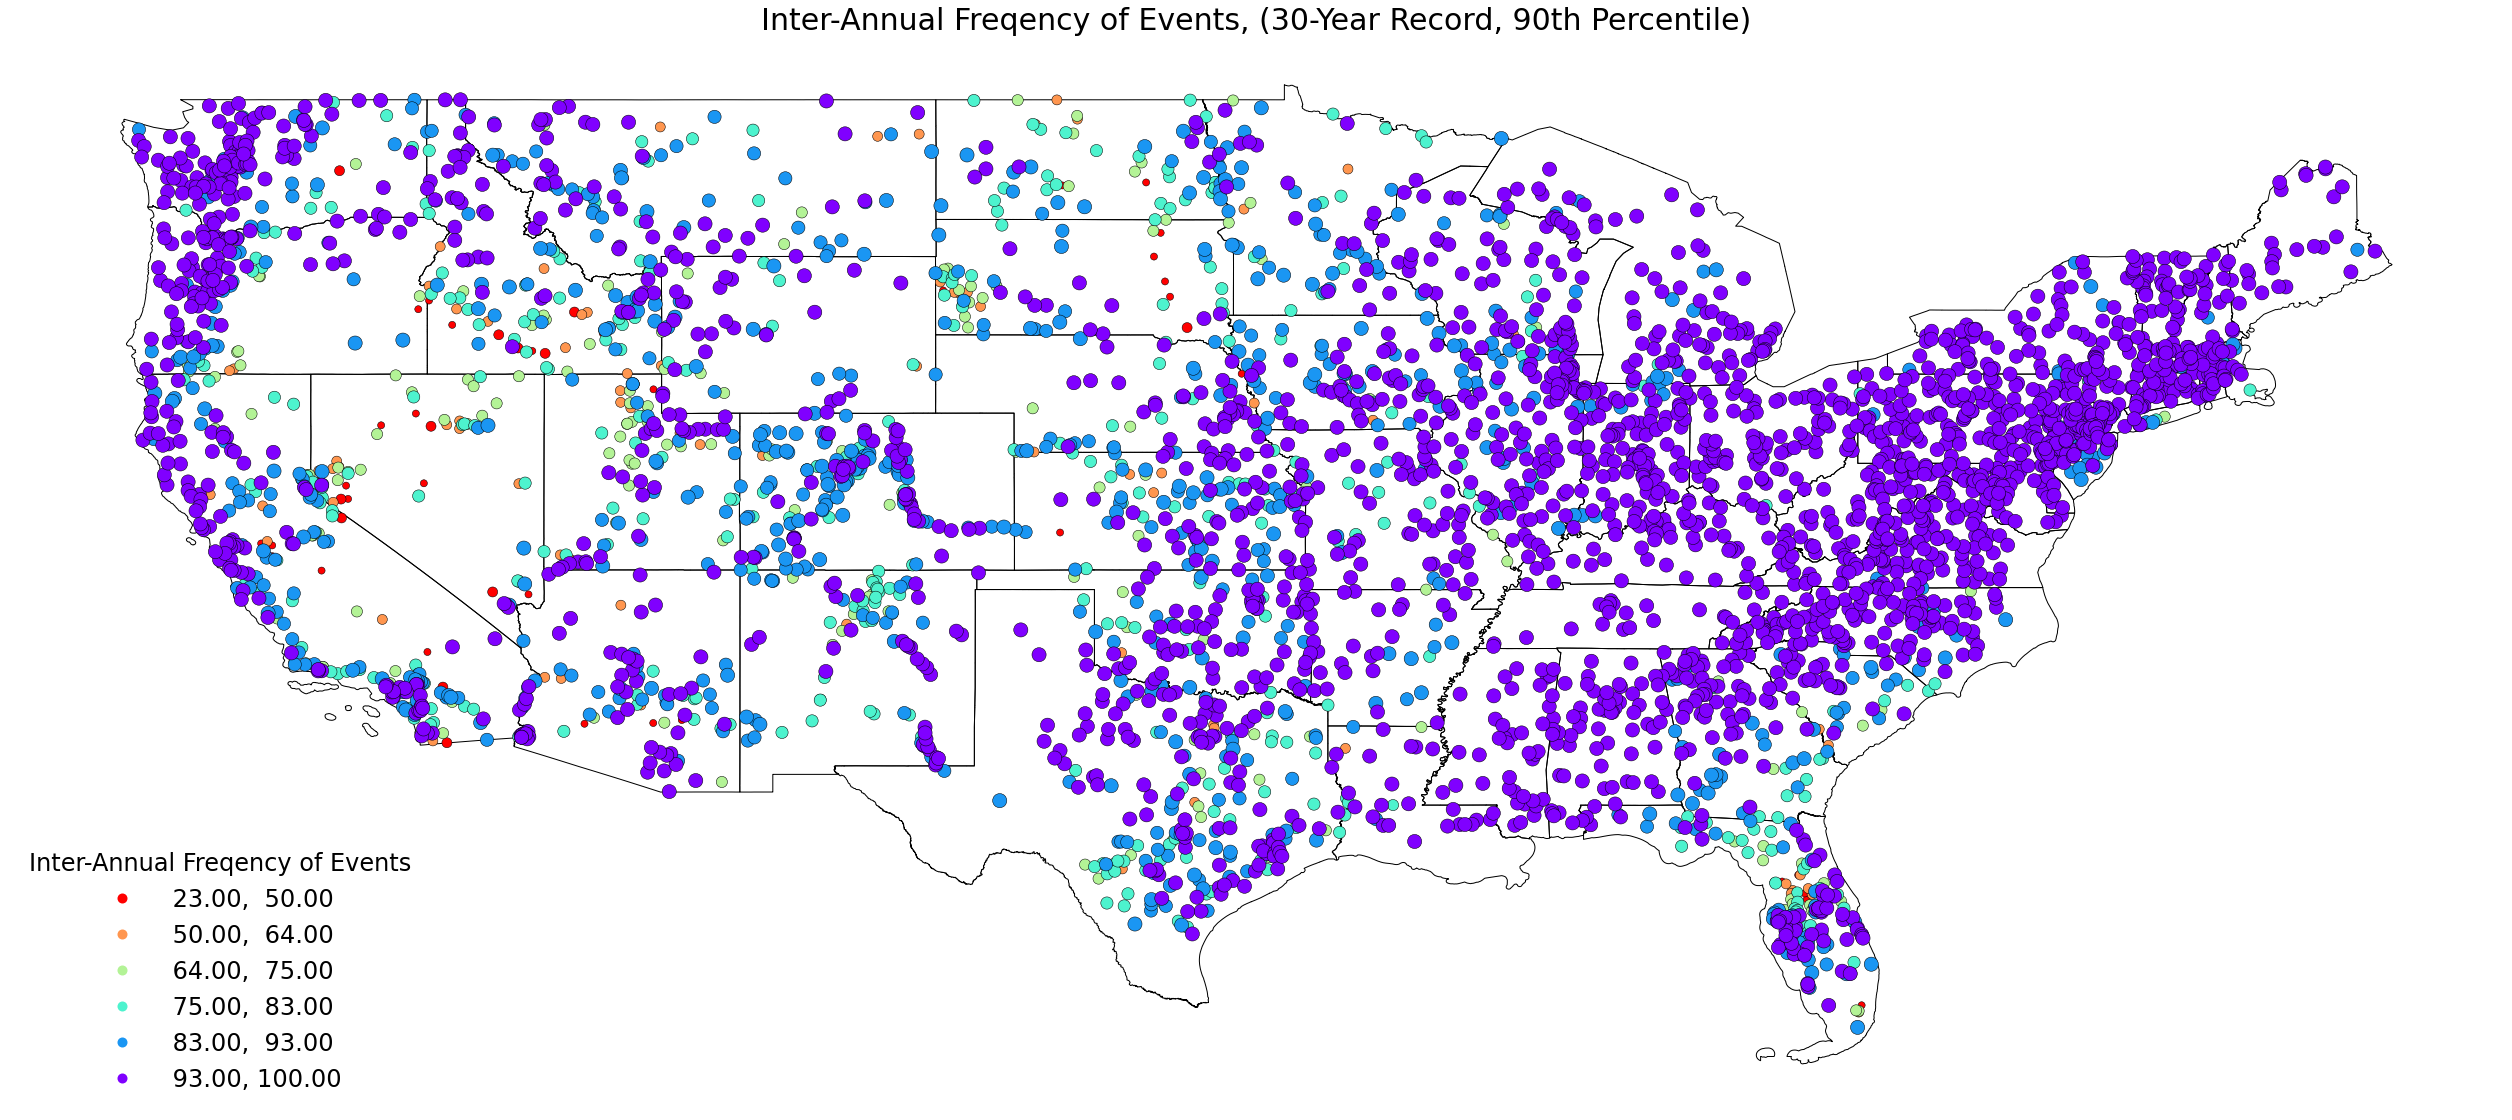

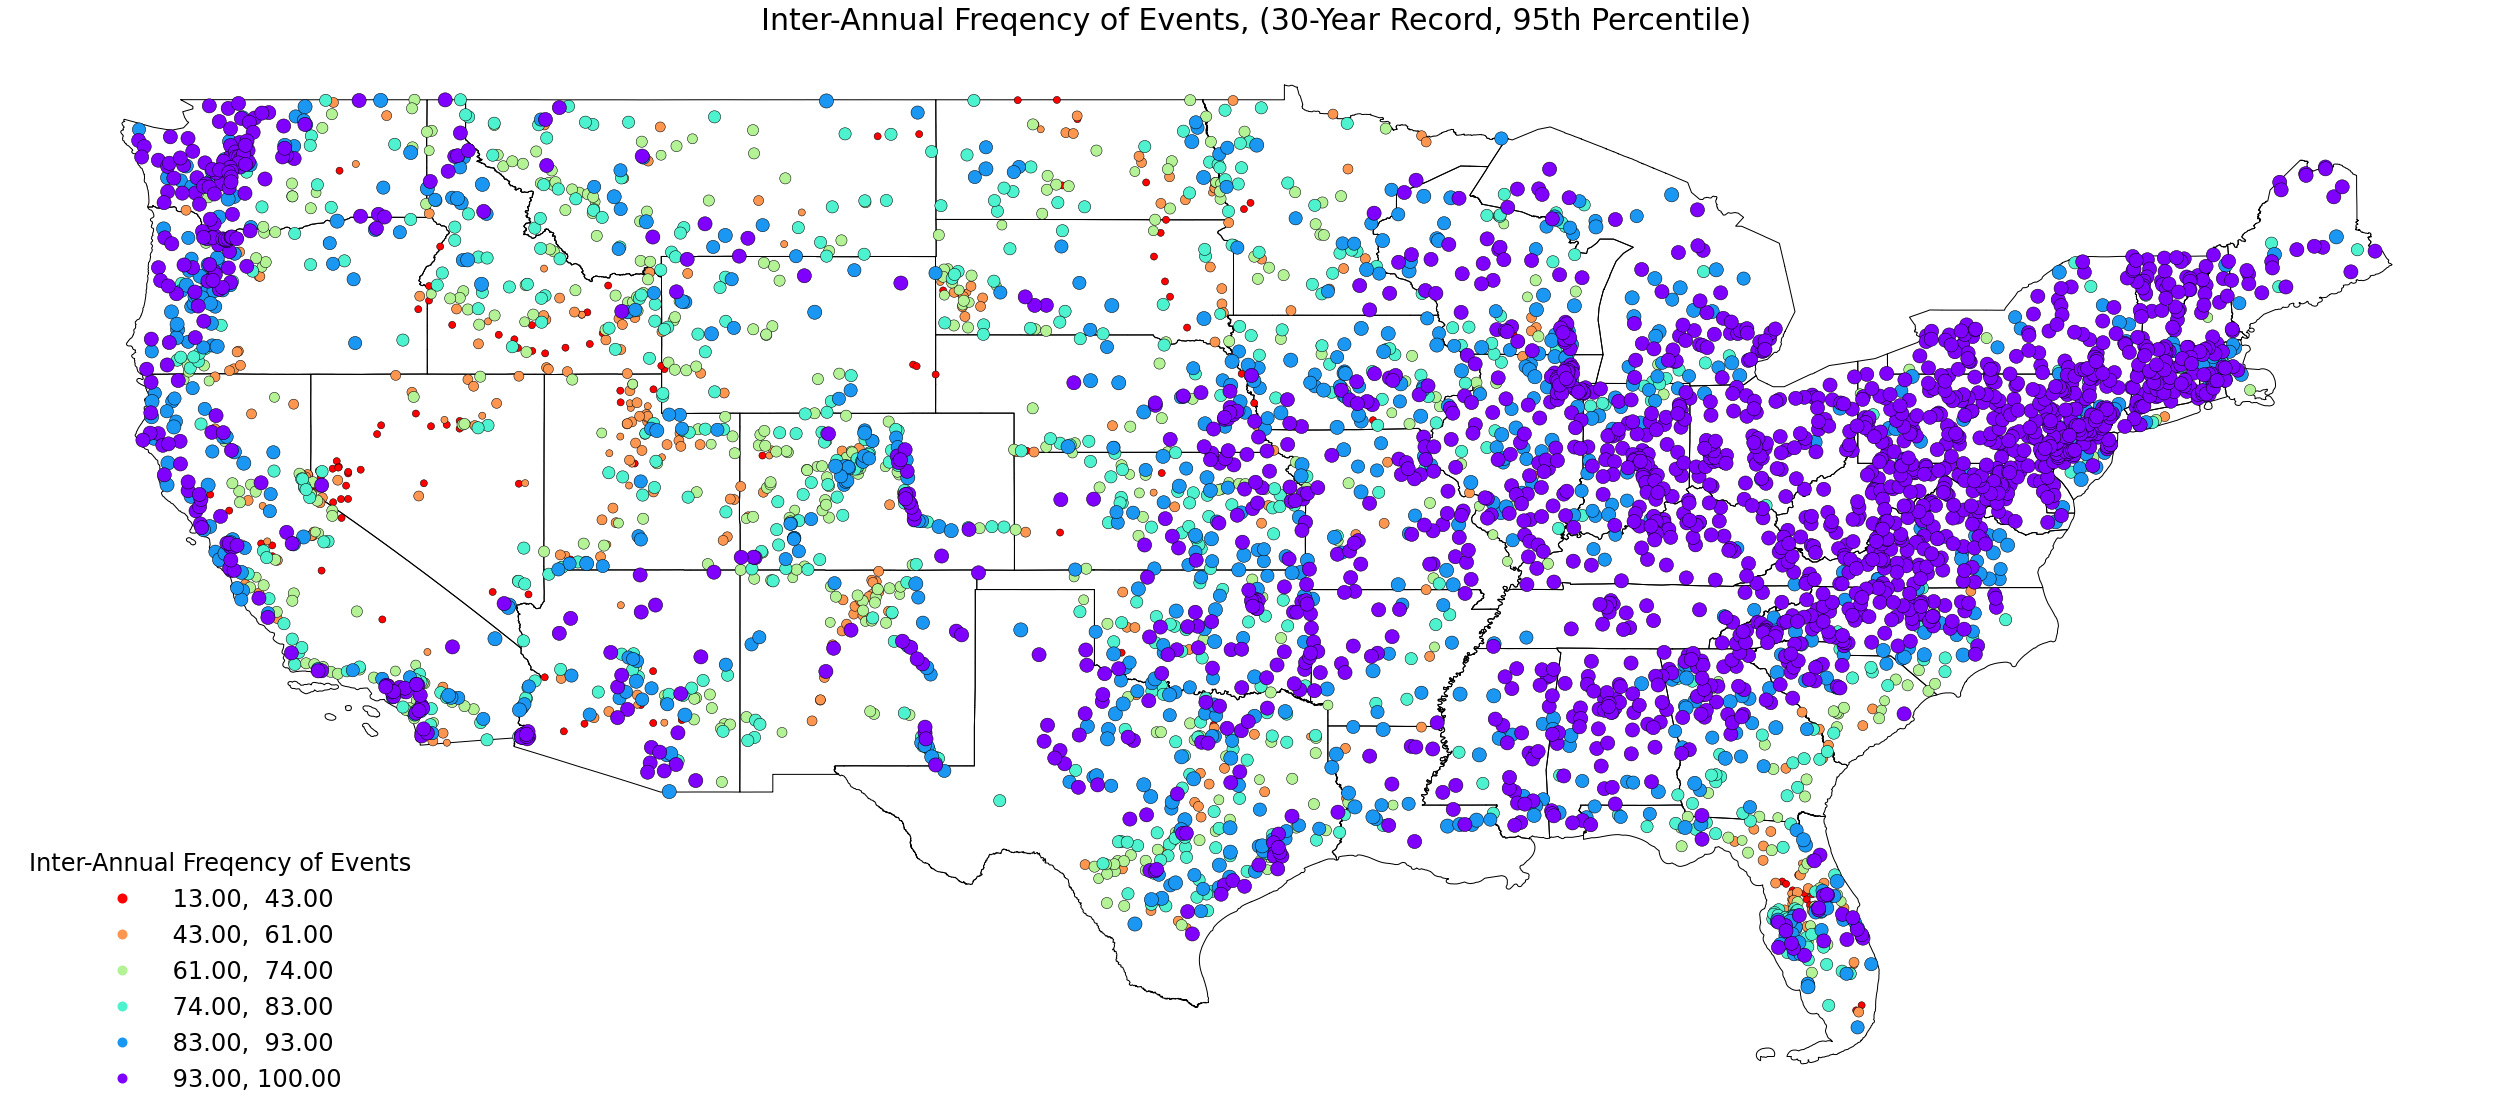

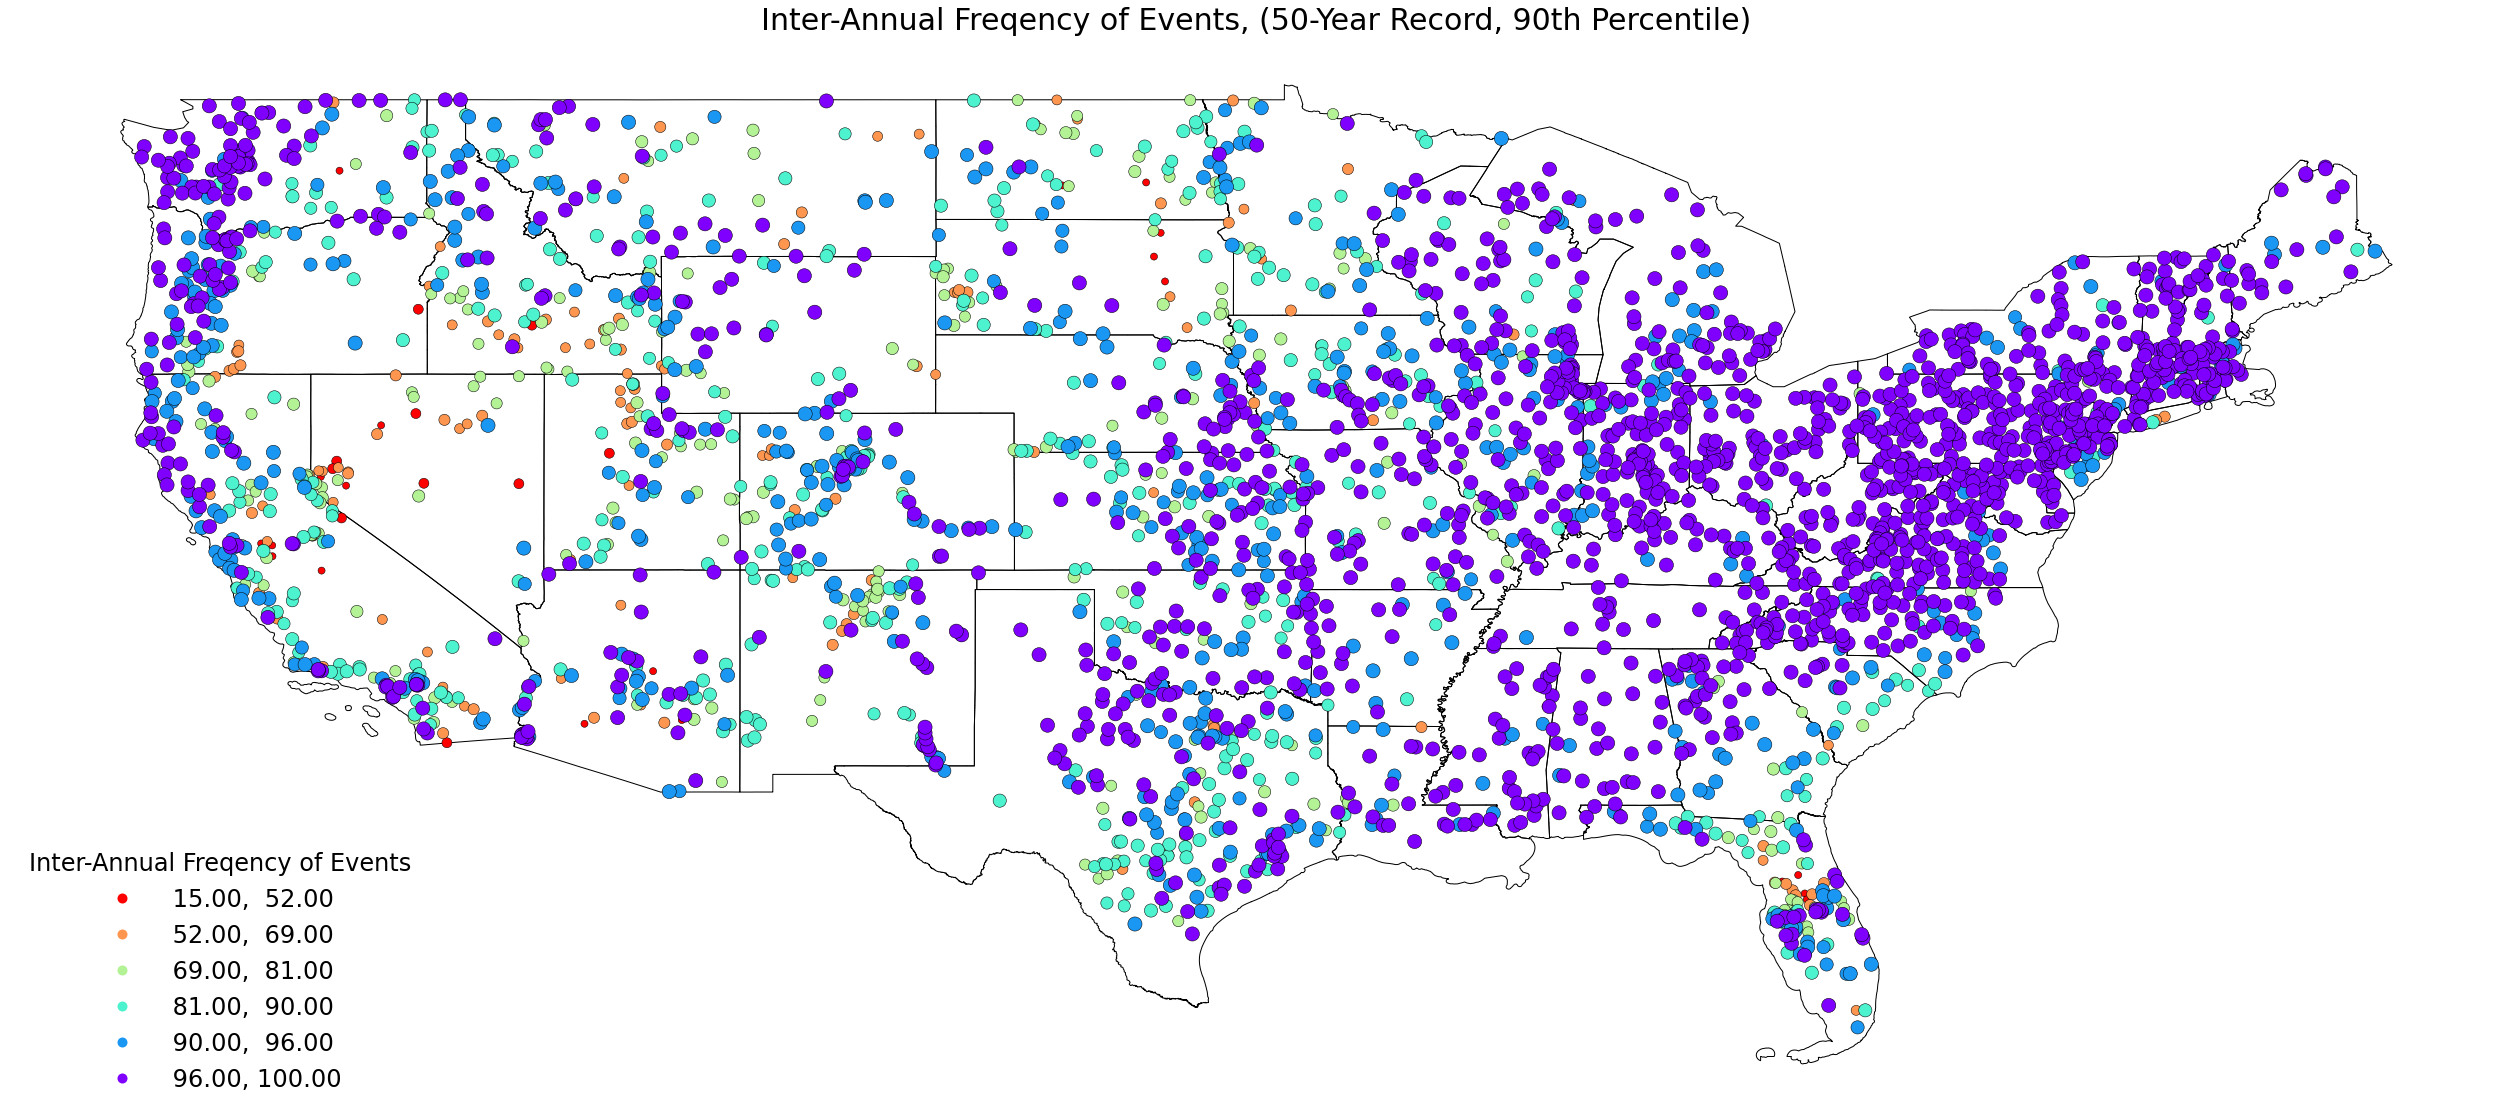

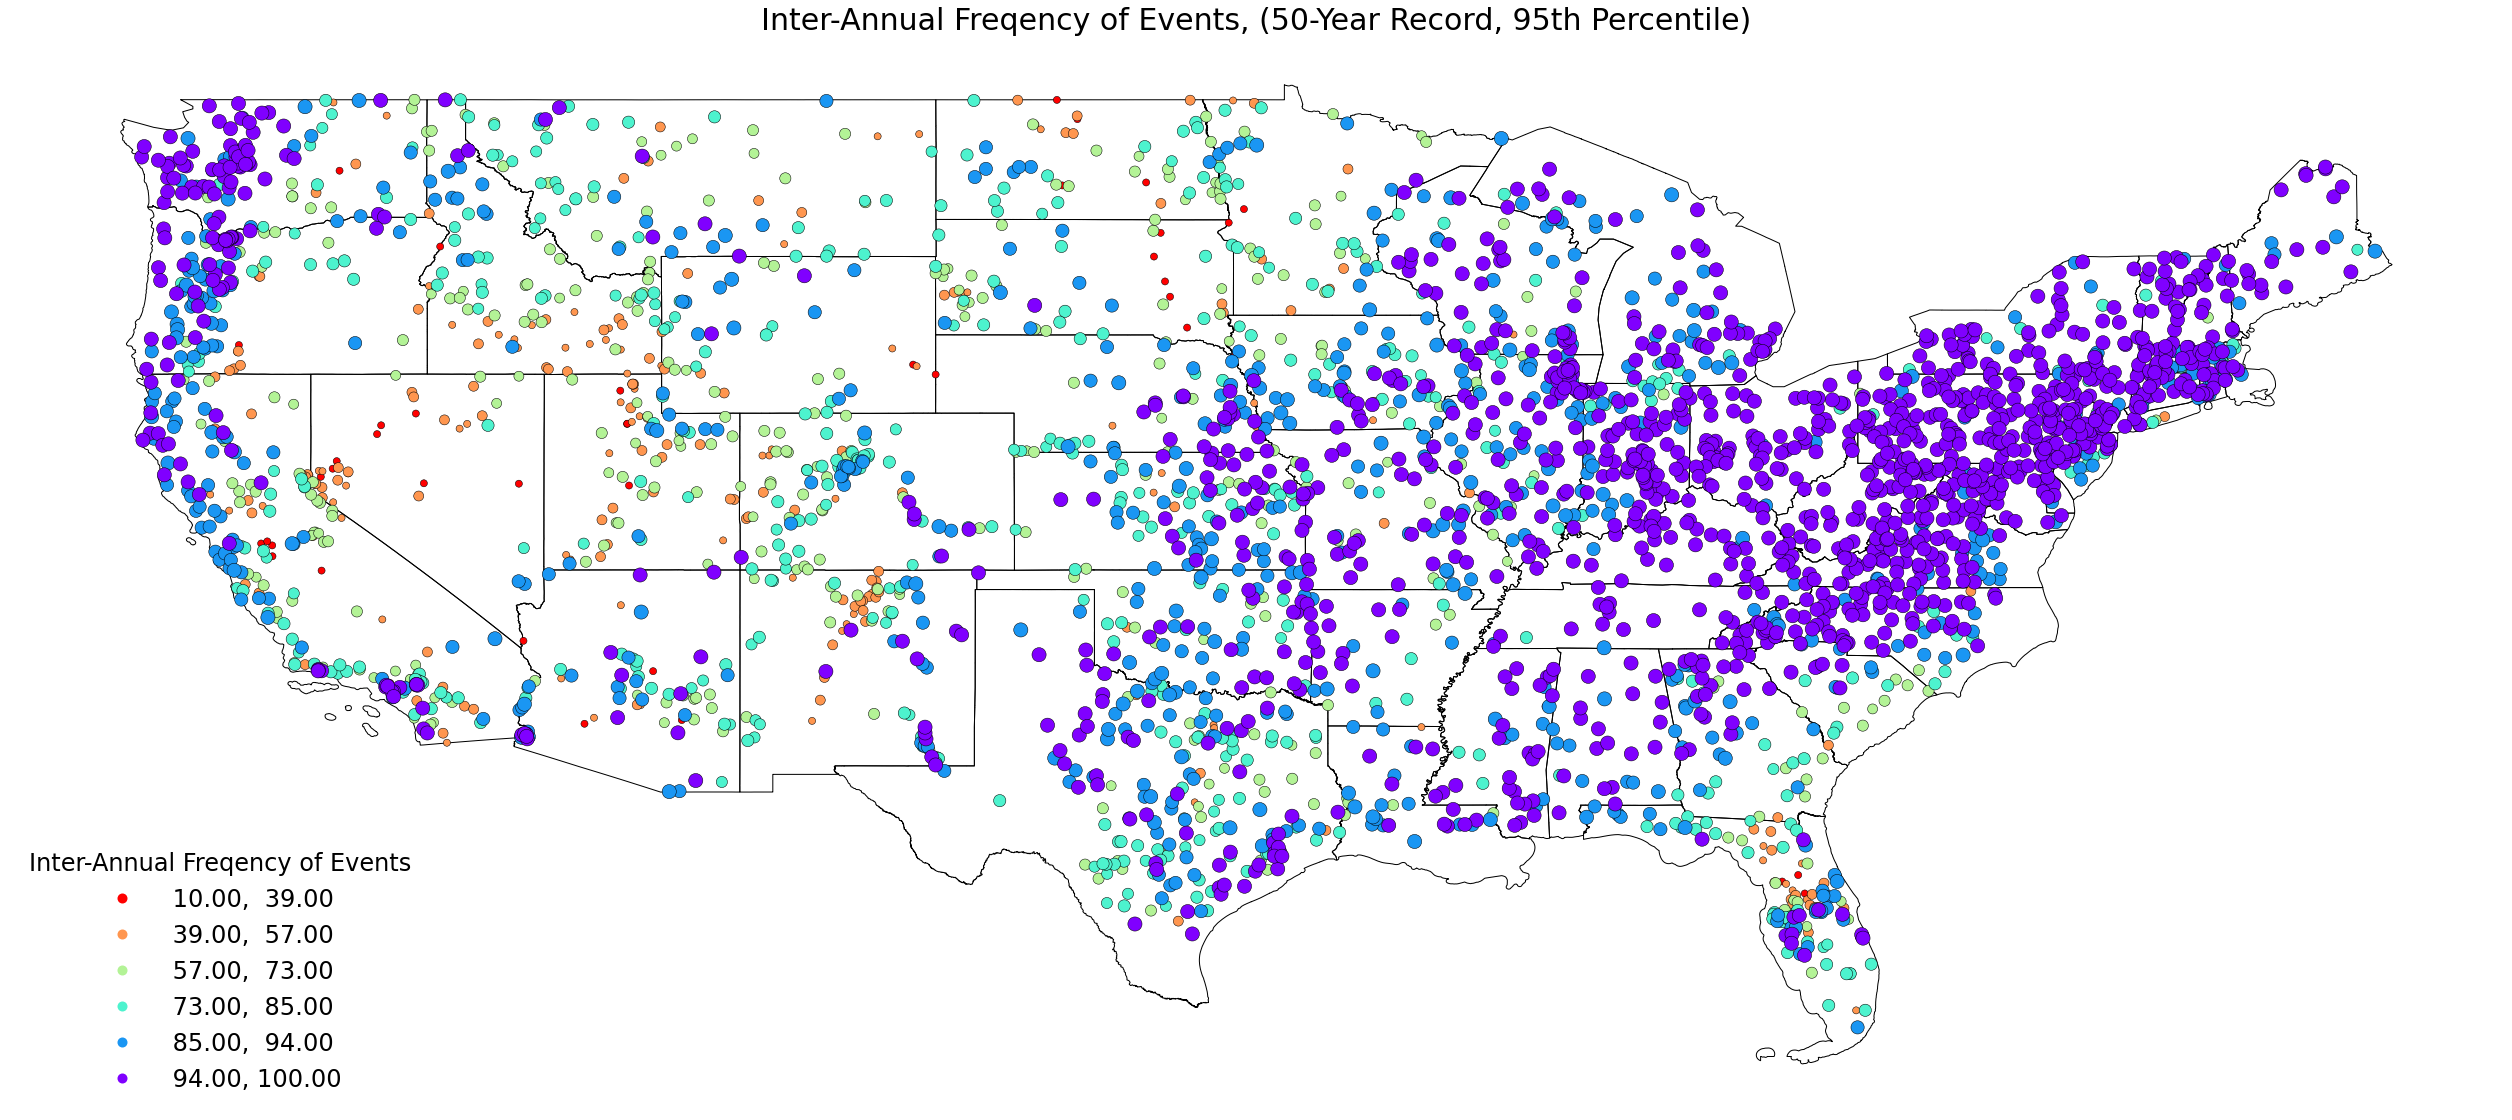

In [220]:
def plot_hmf_metric(df, metric):    
    fig, ax = plt.subplots(figsize=(35, 35))

    plt.title(f'{fn.FLOW_METRIC_UNITS[metric]}, ({date_range}-Year Record, {percentile}th Percentile)', fontsize=30)
    legend_frmt = {
        "title": f"{fn.FLOW_METRIC_UNITS[metric]}",
        #"reverse": False,
        #"loc": "lower right",
        "facecolor": "white",
        #"alignment": 'center',
        "edgecolor": 'none',
        "framealpha": 0.80,
        'fontsize': 24,
        'title_fontsize': 24
    }

    # State basemap
    lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 


    geo_df = fn.convert_geometry(df)
    geo_df = geo_df.merge(df, how='left', left_index=True, right_index=True)

    classifier = mc.NaturalBreaks(geo_df[metric], k=6)
    geo_df = geo_df.sort_values(metric, ascending=True)

    def get_marker_size(value):
        # Define your logic to determine marker size based on the value
        # Inter-annual freq.
        if value < 50:
            return 50
        elif value < 64:
            return 100
        elif value < 77:
            return 125
        elif value < 86:
            return 150
        elif value < 93:
            return 175
        else:
            return 200

    # All gauges
    cmap='rainbow_r' #'rainbow_r'
    geo_df.plot(ax=ax, column=metric, scheme='user_defined', classification_kwds={'bins': classifier.bins}, 
                cmap=cmap, legend=True, legend_kwds=legend_frmt, 
                alpha=1.0, marker='o', 
                markersize=[get_marker_size(value) for value in geo_df[metric]],
                edgecolor='black', linewidth=0.5)

    plt.axis("off")

    plt.tight_layout()
    plt.savefig(f'Saved_Visuals/HMF_metrics/Kirsten/{metric}_{date_range}_{percentile}.png', bbox_inches='tight')

    plt.show()

metric = 'inter_annual%' #'timing' #'intra_annual' #'event_hmf' #'event_duration' #'annual_duration' #'annual_hmf' #'inter_annual%'
for date_range in date_ranges:
    for percentile in percentiles:
        df_wrong_index = dfs_valid[f'{date_range}_{percentile}']
        df = df_wrong_index.reset_index()
        plot_hmf_metric(df, metric)

In [ ]:
        # Annual HMF
        if value < 0.34:
            return 50
        elif value < 1.14:
            return 200
        elif value < 2.80:
            return 350
        elif value < 5.58:
            return 450
        elif value < 8.85:
            return 550        
        else:
            return 800

        # Annual duration
        if value < 39.92:
            return 20
        elif value < 48.67:
            return 50
        elif value < 64.81:
            return 100
        elif value < 99.5:
            return 200
        else:
            return 300
        
        # Event duration
        if value < 6.88:
            return 20
        elif value < 13.9:
            return 50
        elif value < 22.9:
            return 100
        elif value < 38.64:
            return 200
        else:
            return 300
        
        # Event HMF
        if value < 0.19:
            return 20
        elif value < 0.74:
            return 50
        elif value < 1.64:
            return 100
        elif value < 3.16:
            return 200
        else:
            return 300
        
        # Intra-annual
        if value < 4.66:
            return 20
        elif value < 7.86:
            return 50
        elif value < 11.47:
            return 100
        elif value < 16.93:
            return 200
        else:
            return 300
        
        # Timing
        if value < 140.27:
            return 20
        elif value < 173.70:
            return 50
        elif value < 204.24:
            return 100
        elif value < 236.90:
            return 200
        else:
            return 300
        

        # Inter-annual freq.
        if value < 50:
            return 20
        elif value < 69:
            return 50
        elif value < 83:
            return 100
        elif value < 93:
            return 150
        else:
            return 200

## Single Aquifer Plotting
Plot a single aquifer's water guages based on metric of choice. HUC4 watershed boundaries are the blue zones with the aquifer outline in red.

Controls:

In [2]:
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

# Dataset selection
aquifer = cl.high_plains_aquifer
range = 30
quantile = 90

try:
    dataset = f'{aquifer.name}_{range}_{quantile}.xlsx'
    datapath = f'Prelim_Data/{aquifer.name}/{dataset}'
    df = pd.read_excel(datapath, sheet_name='site_metrics')
    df_valid, df_invalid = fn.filter_by_valid(df)
    df_valid = df_valid.reset_index(drop=True)
    print(f'Valid Sites: {len(df_valid)} of {len(df)}')
    
except Exception as e:
    print(e)

# Metric to be plotted where metrics are column names from the dataset
metric = 'annual_hmf' #'annual_hmf'

# True if you want to overwrite current images
overwrite = False
save_img = False

Valid Sites: 274 of 327


In [43]:
# New column of values in a column that correspond with a bin size
geo_df['annual_hmf'].min()
geo_df['annual_hmf'].max()

1.88151853570632

## Multiple Aquifer Plotting
Plot multiple aquifers using multiple datasets on a single map by pointing to a directory with aquifer datasets of matching range and quantile.

Controls:

In [33]:
# List of aquifers to plot
aquifers = [cl.arizona_alluvial_aquifer, cl.central_valley_aquifer, cl.columbia_plateau_aquifer, cl.upper_clairborne_aquifer,
            cl.high_plains_aquifer, cl.snake_river_aquifer, cl.coastal_lowlands_aquifer]

range = 30
quantile = 90

# Metric to be plotted where metrics are column names from the dataset
## 'annual_hmf'
## 'six_mo_hmf'
## 'three_mo_hmf'
## 'annual_duration'
## 'inter_annual%'
## 'intra_annual'
## 'timing'
## 'event_duration'
## 'event_hmf'
## 'threshold'
metric = 'threshold'
# True if you want to show HUC4 boundaries (significantly increases runtime)
show_huc4 = True
show_usgs_aqs = True
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

show_huc2 = False
show_huc4 = False
show_rateb_aqs = True

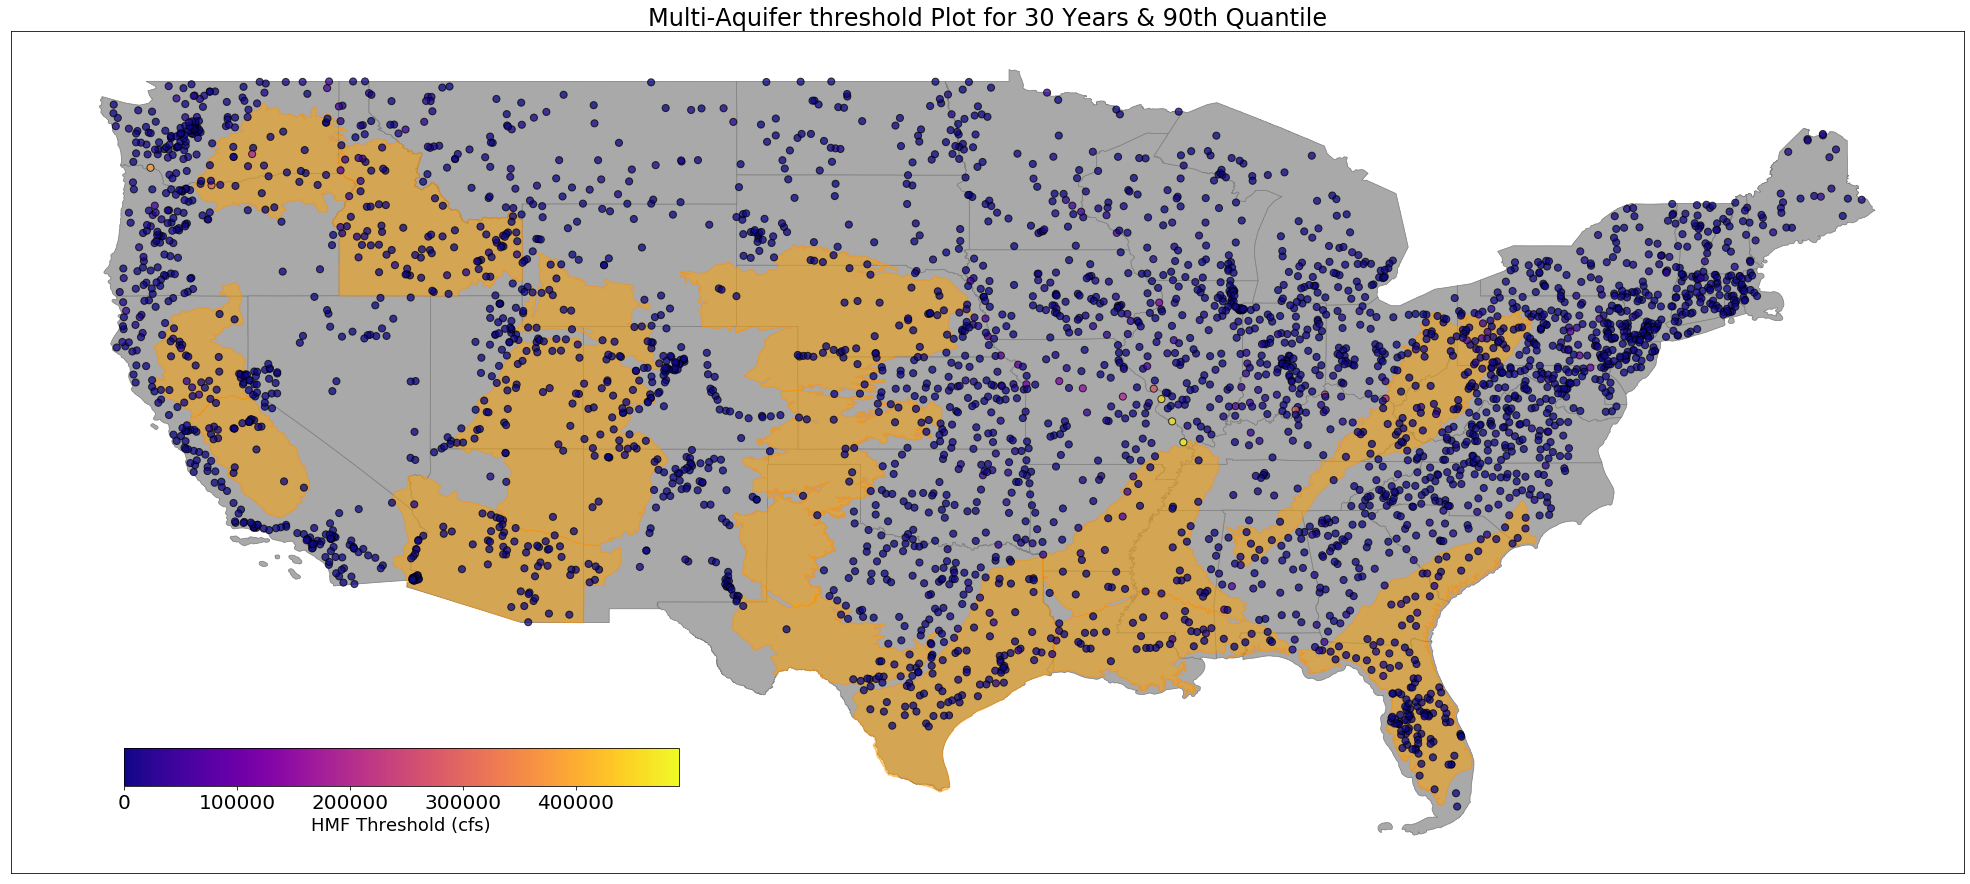

In [35]:
def plot_hmf_metric(metric):    
    fig, ax = plt.subplots(figsize=(35, 35))
    plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)

    # Lower-48 Plot
    if not basemap:
        fn.plot_lower_48(ax)

    if show_rateb_aqs:
        fn.plot_rateb_aquifers(ax=ax, edgecolor='darkorange', facecolor='orange', alpha=0.5)

    if show_huc2:
        fn.plot_huc2(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

    if show_huc4:
        fn.plot_huc4(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

    # Merge all dataframes so we can accurately track min/max values for colorbar scaling
    # Additonally, plot HUC4 and aquifer boundaries
    # df_all_aq = pd.DataFrame()
    # for aq in aquifers:
    #     try:
    #         df = pd.read_excel(f'{aq.datasets_dir}/{aq.name}_{range}_{quantile}.xlsx', sheet_name='site_metrics')
    #         df_all_aq = pd.concat([df_all_aq.reset_index(drop=True), df.reset_index(drop=True)]).reset_index(drop=True)
    #     except Exception as e:
    #         print(f"ERROR: No dataset found for {aq.name} at {aq.datasets_dir}/{aquifer.name}_{range}_{quantile}.xlsx")

    #     # HUC4 Region Plot
    #     if show_huc4:
    #         for root, dirs, files in os.walk(aq.wb_dir):
    #             #print(root, dirs, files)
    #             if os.path.basename(root).startswith('NHD_H_'):
    #                 if aq.wb_shapefiles in files:
    #                     shapefile_aq_path = os.path.join(root, aq.wb_shapefiles)
    #                     ws_gdf = gpd.read_file(shapefile_aq_path)
    #                     ws_gdf = ws_gdf.to_crs(epsg=4269)
    #                     ws_gdf.plot(ax=ax, edgecolor='blue', alpha=0.30, linewidth=0.5)

    #     # Aquifer Boundary Plot
    #     if show_usgs_aqs:
    #         aq_gdf = gpd.read_file(aq.aq_shapefile)
    #         aq_gdf = aq_gdf.to_crs(epsg=4269)
    #         aq_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.00)

    df_all_aq = pd.read_excel(f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx', sheet_name='site_metrics')


    # L/B/W/H
    cax = fig.add_axes([0.17, 0.37, 0.22, 0.015])

    # Water Gauges Plot
    df_all_aq, _ = fn.filter_by_valid(df_all_aq)
    df_all_aq = df_all_aq.reset_index(drop=True)    
    cmap, mappable = fn.scale_colorbar(df_all_aq, metric)
    geo_df = fn.convert_geometry(df_all_aq)
    bx = geo_df.plot(ax=ax, column=df_all_aq[metric], markersize=200, marker='.', cmap='plasma', edgecolor='black', linewidth=1, alpha=0.75)

    # Colorbar setup
    cbx = plt.colorbar(mappable, cax=cax, pad=2.0, shrink=0.5, orientation='horizontal', alpha=1.0)
    cbx.set_label(fn.FLOW_METRIC_UNITS[metric], size=18)
    cbx.ax.tick_params(labelsize=20)  
    ax.set_yticks([])
    ax.set_xticks([])

    #if basemap:
    #    fn.plot_basemap(ax)

    # Save images if they don't exist or if overwrite is True
    if save_img:
        img_path = f'Saved_Visuals/National_{metric}_{range}_{quantile}.png'
        fn.save_plot_as_image(img_path, overwrite)    
    return
    
plot_hmf_metric(metric)

## National Validity Plot
Plots the validity of every water gauge with daily streamflow data available

In [114]:
data_range = 30
folder = 'National_Validity'
dataset = f'National_Validity.xlsx'
datapath = f'Prelim_Data/{folder}/{dataset}'
lower_48_shp_path = 'ShapeFiles/Lower48/lower48.shp'

show_huc2 = False
show_huc4 = False
show_rateb_aqs = False

save_img= True
overwrite = True

datapath = f'Prelim_Data/National_Validity/National_Validity.xlsx'
df_validity = pd.read_excel(datapath, sheet_name='Sheet1')

In [116]:
data_range = 30

df_30_90['date_range_30'] = df_30_90['valid'] == True
df_50_90['date_range_50'] = df_50_90['valid'] == True
df_30_90['data_cont_30'] = df_30_90['missing_data%'] <= 10
df_50_90['data_cont_50'] = df_50_90['missing_data%'] <= 10

geo_df = fn.convert_geometry(df_30_90)

colors = df_30_90[f'date_range_{data_range}'].astype(str) + df_30_90[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

print(f'30-Year Date Range')
print(f'Total Sites with 00060_Mean Data: {len(df_30_90)}')
print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_30_90)*100, 2)}%)')
print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_30_90)*100, 2)}%)')
print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_30_90)*100, 2)}%)')
print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_30_90)*100, 2)}%)')

data_range = 50

df_30_90['date_range_30'] = df_30_90['valid'] == True
df_50_90['date_range_50'] = df_50_90['valid'] == True
df_30_90['data_cont_30'] = df_30_90['missing_data%'] <= 10
df_50_90['data_cont_50'] = df_50_90['missing_data%'] <= 10

geo_df = fn.convert_geometry(df_50_90)

colors = df_50_90[f'date_range_{data_range}'].astype(str) + df_50_90[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

print(f'50-Year Date Range')
print(f'Total Sites with 00060_Mean Data: {len(df_30_90)}')
print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_50_90)*100, 2)}%)')
print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_50_90)*100, 2)}%)')
print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_50_90)*100, 2)}%)')
print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_50_90)*100, 2)}%)')

30-Year Date Range
Total Sites with 00060_Mean Data: 7858
Valid Range and Continuity: 4241 (53.97%)
Valid Range, Invalid Continuity: 0 (0.0%)
Invalid Range, Valid Continuity: 29 (0.37%)
Invalid Range and Continuity: 3588 (45.66%)
50-Year Date Range
Total Sites with 00060_Mean Data: 7858
Valid Range and Continuity: 3316 (42.2%)
Valid Range, Invalid Continuity: 0 (0.0%)
Invalid Range, Valid Continuity: 13 (0.17%)
Invalid Range and Continuity: 4529 (57.64%)


C:\Users\kondr\anaconda3\lib\site-packages\geopandas\plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


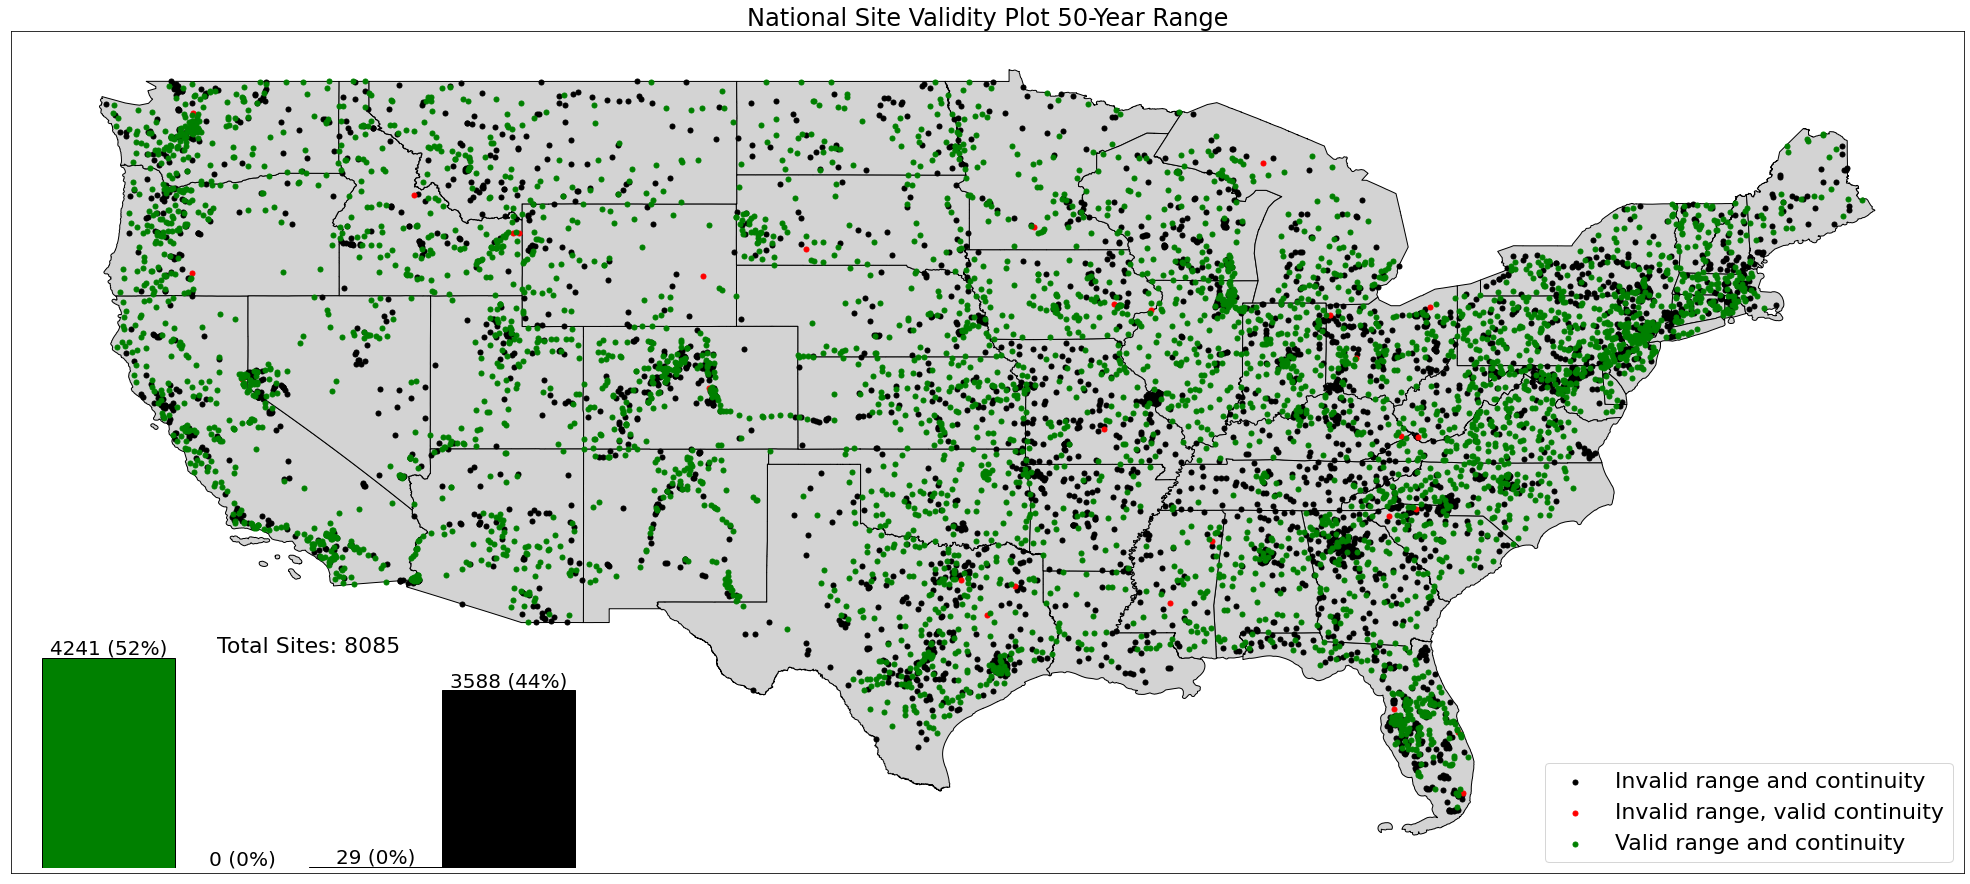

In [118]:
fig, ax = plt.subplots(figsize=(35, 35))
plt.title(f"National Site Validity Plot {data_range}-Year Range", loc='center', fontsize=24)

lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
lower48 = lower48.to_crs(epsg=4269)
#lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  

if show_rateb_aqs:
    fn.plot_rateb_aquifers(ax=ax, edgecolor='darkorange', facecolor='orange', alpha=0.5)
    
if show_huc2:
    fn.plot_huc2(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)
    
if show_huc4:
    fn.plot_huc4(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

data_range = 30

df_30_90['date_range_30'] = df_30_90['valid'] == True
df_50_90['date_range_50'] = df_50_90['valid'] == True
df_30_90['data_cont_30'] = df_30_90['missing_data%'] <= 10
df_50_90['data_cont_50'] = df_50_90['missing_data%'] <= 10

geo_df = fn.convert_geometry(df_30_90)

colors = df_30_90[f'date_range_{data_range}'].astype(str) + df_30_90[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

gdf_black.plot(ax=ax, color='black', label='Invalid range and continuity', markersize=100, marker='.', alpha=1.0)
gdf_red.plot(ax=ax, color='red', label='Invalid range, valid continuity', markersize=100, marker='.', alpha=1.0)
gdf_yellow.plot(ax=ax, color='yellow', label='Valid range, invalid continuity', markersize=100, marker='.', alpha=1.0)
gdf_green.plot(ax=ax, color='green', label='Valid range and continuity', markersize=100, marker='.', alpha=1.0)
plt.legend(prop={'size': 22}, loc='lower right')

order = {'TrueTrue': 0, 'TrueFalse': 1, 'FalseTrue': 2, 'FalseFalse': 3}
colors = colors.map(order)
axins = inset_axes(ax, width="30%", height="25%", loc='lower left', axes_kwargs={'frame_on': False})
counts, edges, patches = axins.hist(colors, bins=4, edgecolor='black')

# Define colors for each bin
bin_colors = ['green', 'yellow', 'red', 'black']

# Iterate over patches (bars) and set their colors
for patch, color in zip(patches, bin_colors):
    patch.set_facecolor(color)

for count, edge, patch in zip(counts, edges, patches):
    height = patch.get_height()
    center = edge + (patch.get_x() + patch.get_width() - edge) / 2
    axins.text(center, height - 0.5, f'{count:.0f} ({round(count/len(df_validity)*100, 0):.0f}%)', ha='center', va='bottom', fontsize=20)

axins.set_ylim(0, max(counts) + 5)
axins.set_title(f'Total Sites: {len(df_validity)}', fontsize=22, loc='center')
axins.set_xticks([])
axins.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])

if save_img:
    img_path = f'Saved_Visuals/Valid_gages/natl_validity_aquifers_{data_range}.png'
    #img_path = f'Saved_Visuals/Valid_gages/valid_only_aquifers_{data_range}.png'
    fn.save_plot_as_image(img_path, overwrite) 

plt.show()


# print(f'Total Sites with 00060_Mean Data: {len(df_validity)}')
# print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_validity)*100, 2)}%)')
# print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_validity)*100, 2)}%)')
# print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_validity)*100, 2)}%)')
# print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_validity)*100, 2)}%)')

## Box Plot and Outliers of HMF Metrics
This plot shows the distribution of each HMF metric, illustrating the mean, median, and interquartile ranges. Outliers (less than the 10th percentile and greater than the 90th percentile) are also selected for each metric

In [76]:
range = 30
quantile = 90

df_natl_30_90 = pd.read_excel(f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx', sheet_name='site_metrics')
df_natl_30_90, _ = fn.filter_by_valid(df_natl_30_90)

# Metric to be plotted where metrics are column names from the dataset
metric_list = ['threshold', 'annual_hmf', 'six_mo_hmf', 'three_mo_hmf', 'annual_duration', 'event_duration', 'event_hmf', 'inter_annual%', 'intra_annual', 'timing']
## 'annual_hmf'
## 'six_mo_hmf'
## 'three_mo_hmf'
## 'annual_duration'
## 'inter_annual%'
## 'intra_annual'
## 'timing'
## 'event_duration'
## 'event_hmf'
## 'threshold'
metric = 'annual_hmf'

# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True

In [78]:
#df_natl_30_90

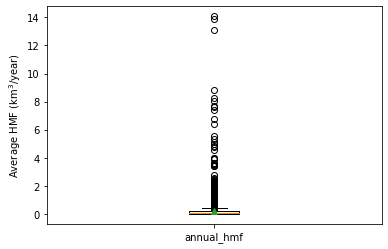

In [79]:
def plot_hmf_metric_boxplot(df, metric):
    plt.boxplot(df[metric], showmeans=True)
    #print(boxplot['fliers'])
    plt.xticks(ticks=[1], labels=[f'{metric}'])
    plt.ylabel(fn.FLOW_METRIC_UNITS[metric])
    plt.show()
    return

def get_boxplot_outliers(df, metric):
    boxplot = plt.boxplot(df[metric], showmeans=True)
    plt.xticks(ticks=[1], labels=[f'{metric}'])
    plt.ylabel(fn.FLOW_METRIC_UNITS[metric])
    plt.show()
    
    # Extract outliers
    outliers = [flier.get_ydata() for flier in boxplot['fliers']] # note: boxplot['fliers'] is a graphical object
    # Flatten the outliers list
    outliers = [item for sublist in outliers for item in sublist]
    outlier_site_nos = df.loc[df[metric].isin(outliers), 'site_no']
    return outliers, outlier_site_nos

# All HMF metrics
#for metric in metric_list:
#    plot_hmf_metric_boxplot(df_natl_30_90, metric)

# Singular HMF metric
#plot_hmf_metric_boxplot(df_natl_30_90, metric)
outliers, outlier_site_nos = get_boxplot_outliers(df_natl_30_90, metric)

In [88]:
# Get 10th percentile of sites
def get_percentile_sites(df, metric, percentile):
    df_metric = pd.DataFrame(df[metric])
    threshold = df_metric.quantile(q=percentile, axis=0).iloc[0]
    if percentile < 0.5:
        df_metric_subset = df_metric[df_metric[metric] < threshold]
    else:
        df_metric_subset = df_metric[df_metric[metric] > threshold]
    perctile_site_nos = df.loc[df[metric].isin(df_metric_subset[metric]), 'site_no']
    return perctile_site_nos

perctile_site_nos_10 = get_percentile_sites(df_natl_30_90, metric, 0.1)
perctile_site_nos_90 = get_percentile_sites(df_natl_30_90, metric, 0.9)
print(perctile_site_nos_10)
print(perctile_site_nos_90)

62       9384000
63       9390500
78       9428505
79       9428510
100      9484600
          ...   
4084    12472600
4120     3052500
4214     5406500
4234     6253000
4271    13018300
Name: site_no, Length: 337, dtype: int64
30      2425000
44      2465000
45      2467000
47      2469761
59      9380000
         ...   
4189    5365500
4193    5369500
4207    5400760
4212    5404000
4215    5407000
Name: site_no, Length: 337, dtype: int64


## Monthly HMF Frequency per Aquifer Plot
This plot shows the average frequency in which sites experienced HMF, broken down by month, across an aquifer region. The `mfreq_` datasheets are generated by commented out code in `monthly_hmf()` automatically when aquifer analysis is run. To generate an `mfreq_` dataset, uncomment the code, run aquifer analysis, and then move/rename the resulting dataset to `'Sample_Sheets/mfreq_{aquifer_name}_{range}_{quantile}.csv'`

In [81]:
aquifer = cl.arizona_alluvial_aquifer
range = 30
quantile = 90

hist_data_set = f'mfreq_{aquifer.name}_{range}_{quantile}.csv'
hist_data_path = f'Sample_Sheets/{hist_data_set}'

num_sites = len(pd.read_excel(f'Prelim_Data/{aquifer.name}/{aquifer.name}_{range}_{quantile}.xlsx'))

df_freq = pd.read_csv(hist_data_path)
df_freq = df_freq.sort_values('month')
df_freq = df_freq.drop(columns='Unnamed: 0')
df_freq = df_freq.reset_index(drop=True)
df_freq = df_freq.fillna(0)
df_freq['count'] = df_freq['count'] / num_sites
df_freq['00060_Mean'] = df_freq['00060_Mean'] / num_sites

C:\Users\alekh\AppData\Local\Temp\ipykernel_9116\3884315333.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, ax=None)


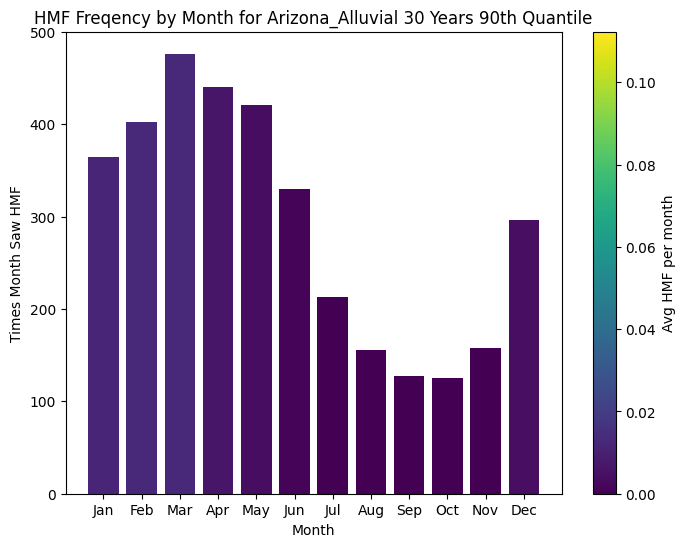

In [82]:
plt.figure(figsize=(8, 6))
plt.xticks(df_freq['month'], [calendar.month_name[int(m)][:3] for m in df_freq['month']], rotation=0)

vmin = df_freq['00060_Mean'].min()
vmax = df_freq['00060_Mean'].max()
norm = mcolors.Normalize(vmin, vmax)
cmap = 'viridis'
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(df_freq['00060_Mean'])

bars = plt.bar(df_freq['month'], df_freq['count'], color=plt.cm.viridis(df_freq['00060_Mean']))
cbar = plt.colorbar(mappable, ax=None)
cbar.set_label('Avg HMF per month')
plt.title(f'HMF Freqency by Month for {aquifer.name} {range} Years {quantile}th Quantile')
plt.xlabel('Month')
plt.ylabel('Times Month Saw HMF')
plt.show()